# Project Setup and Imports
This section installs and imports essential libraries required for data processing, visualization, machine learning, and deep learning. Below is a brief overview of the tools used:

- PyTorch Lightning and Transformers: Essential for building and fine-tuning deep learning and transformer models. PyTorch Lightning simplifies training workflows, while Hugging Face's Transformers provide pre-trained models like DistilBERT for NLP tasks.

- Scikit-Learn: Used extensively for machine learning model implementation, including Logistic Regression, Naive Bayes, and SVM, as well as ensemble methods like AdaBoost and Gradient Boosting. Scikit-Learn also provides functions for cross-validation, performance metrics, and data splitting.

- Visualization Libraries: Matplotlib and Seaborn are employed to plot data distributions, correlations, and model evaluation results. WordCloud is used to visually represent common words in toxic and non-toxic comments.

- Natural Language Processing: NLTK and Gensim are utilized for text preprocessing and feature extraction. NLTK aids in tasks like tokenization and stopword removal, while Gensim provides word embeddings to capture semantic meaning.

- Dataset Access: Kaggle API commands are used to download the dataset for the Jigsaw Toxic Comment Classification Challenge. This dataset serves as the foundation for training and testing models across various toxicity categories.

This setup prepares the environment for the next steps of data preprocessing, model training, and evaluation.

In [ ]:
# Install PyTorch Lightning for streamlined deep learning model training
!pip install pytorch_lightning --quiet

# Install Accelerate, a library for optimized hardware utilization during training
!pip install -U accelerate

# Install Hugging Face Transformers for accessing pre-trained models and fine-tuning capabilities
!pip install -U transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 815.2/815.2 kB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 926.4/926.4 kB 35.5 MB/s eta 0:00:00


In [ ]:
# System and OS Operations
# Used for file management, timing operations, and environmental variable handling
import os               # OS operations
import time             # Time-related operations
from timeit import default_timer as timer  # Timer for performance measurement

# Data Handling and Processing
# Libraries for data manipulation, statistical analysis, and text vectorization
import pandas as pd                                     # Data manipulation
import numpy as np                                      # Numerical operations
from collections import Counter                         # Counting frequency of elements
from sklearn.model_selection import (                   # Model selection and evaluation
    train_test_split, GridSearchCV, cross_val_score,
    cross_val_predict, KFold, StratifiedKFold
)
from sklearn.feature_extraction.text import TfidfVectorizer  # Text feature extraction

# Visualization
# Libraries for data visualization, including word clouds and statistical plots
import matplotlib.pyplot as plt                         # Plotting library
import seaborn as sns                                   # Statistical data visualization
from wordcloud import WordCloud                         # Generate word clouds

# Text Preprocessing
# Libraries for text cleaning, tokenization, and lemmatization
import re                                               # Regular expressions for text cleaning
import string                                           # String operations
import nltk                                             # NLP tools
from nltk.corpus import stopwords                       # Stop words for NLP
from nltk.stem import WordNetLemmatizer, PorterStemmer  # Word lemmatization and stemming
from nltk.tokenize import word_tokenize                 # Word tokenization
import gensim.downloader as api                         # Pretrained word embeddings

# Machine Learning Models
# Classical machine learning models for classification and ensemble methods
from sklearn.naive_bayes import MultinomialNB           # Naive Bayes classifier
from sklearn.linear_model import LogisticRegression     # Logistic Regression classifier
from sklearn.svm import LinearSVC                       # Support Vector Classifier (Linear)
from sklearn.ensemble import (                          # Ensemble methods
    AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier
)
from sklearn.multioutput import MultiOutputClassifier   # Multi-output classifier
from xgboost import XGBClassifier                       # XGBoost classifier
import xgboost as xgb                                   # XGBoost library

# Model Evaluation Metrics
# Metrics for model evaluation, especially for multi-label classification
from sklearn.metrics import (                           # Performance metrics
    f1_score, precision_score, recall_score,
    confusion_matrix, hamming_loss, make_scorer, roc_auc_score
)

# Pipeline
from sklearn.pipeline import Pipeline                   # Pipeline for model workflows

# Deep Learning with PyTorch and PyTorch Lightning
# Libraries for building, training, and evaluating neural networks
import torch                                            # PyTorch library
import torch.nn as nn                                   # Neural network modules
import torch.nn.functional as F                         # Functional tools for neural networks
from torch.utils.data import (                          # Data handling in PyTorch
    random_split, Dataset, DataLoader
)
from torch.optim import AdamW                           # Optimizer
from torch.optim.lr_scheduler import CosineAnnealingLR  # Learning rate scheduler
import torchmetrics                                     # Metrics for PyTorch
import pytorch_lightning as pl                          # PyTorch Lightning for simplified training
from pytorch_lightning.tuner import Tuner               # Tuner for hyperparameter tuning
from pytorch_lightning.callbacks import ModelCheckpoint # Model checkpointing

# Gensim Word Embeddings
from gensim.models import FastText                      # FastText model for word embeddings

# Hugging Face Transformers
# Pretrained transformer models and tokenizers for NLP
from transformers import (                              # Tokenizers and pretrained models
    DistilBertTokenizer, AutoTokenizer,
    DistilBertForSequenceClassification, AutoModelForSequenceClassification
)
from transformers import EvalPrediction                 # Evaluation predictions
from transformers import TrainingArguments, Trainer     # Training tools

# Additional Utilities
from statistics import mean                             # Statistical operations
from tqdm import tqdm                                   # Progress bar for long operations
from google.colab import drive                          # Google Colab integration
from pytorch_lightning.callbacks import Callback        # Custom callback for Lightning

In [ ]:
# Set Kaggle configuration directory to the current path for accessing Kaggle API credentials
os.environ['KAGGLE_CONFIG_DIR'] = '.'

In [ ]:
# Download the dataset for the Jigsaw Toxic Comment Classification Challenge from Kaggle
!kaggle competitions download -c jigsaw-toxic-comment-classification-challenge

 78% 41.0M/52.6M [00:00<00:00, 53.4MB/s]
100% 52.6M/52.6M [00:00<00:00, 65.8MB/s]


In [ ]:
# Unzip the downloaded dataset into the 'data' directory
!unzip jigsaw-toxic-comment-classification-challenge.zip -d data

Archive:  jigsaw-toxic-comment-classification-challenge.zip
  inflating: data/sample_submission.csv.zip  
  inflating: data/test.csv.zip       
  inflating: data/test_labels.csv.zip  
  inflating: data/train.csv.zip      


# Data Preparation and Exploration

This section of the notebook focuses on loading and exploring the datasets for the multi-label classification of toxicity in comments. The datasets include the training data, test data, and submission format.

## 1. Load Datasets
The training, test, and submission datasets are loaded into Pandas DataFrames from zipped CSV files:
- **Training Dataset**: `train.csv.zip`
- **Test Dataset**: `test.csv.zip`
- **Submission Format**: `test_labels.csv.zip`

## 2. Random Samples
Random samples of 10 rows are displayed from each dataset to provide a quick overview of the data structure and content.

## 3. Target Columns
The target columns for the multi-label classification task are defined:
- `toxic`
- `severe_toxic`
- `obscene`
- `threat`
- `insult`
- `identity_hate`

## 4. Summary Information
A summary of the training dataset is displayed, including column types and non-null counts, helping to understand the data completeness.

## 5. Missing Values
The count of missing values in each column of the training dataset is printed, allowing us to assess data quality.

## 6. Example Comments
An example of a non-toxic comment and a toxic comment from the dataset are displayed to illustrate the difference in content.

## 7. Target Label Distribution
The normalized distribution of each target label is printed, showing the proportion of toxic and non-toxic labels in the dataset.

## 8. Non-ASCII Characters Check
A function is defined to check for non-ASCII characters in the comments. The count of comments containing such characters is printed, and if any are found, a random comment is displayed.

## 9. Distribution Visualization
A bar plot visualizes the distribution of toxic and non-toxic labels for each target category. The counts of comments labeled as toxic (1) and non-toxic (0) are presented.

## 10. Comment Length Statistics
The length of each comment (in terms of word count) is calculated, and basic statistics (mean, median, max, min, percentiles) are displayed.

## 11. Comment Length Distribution
A histogram shows the distribution of comment lengths, providing insight into the comment structure.

## 12. Target Label Correlation
A correlation matrix is computed for the target labels to assess relationships between different toxicity categories. A heatmap visualizes these correlations.

## 13. Word Cloud Generation
A function to generate word clouds is defined. Word clouds are created for the comments associated with each toxic label and for non-toxic comments, providing a visual representation of the most common words used in the dataset.

This comprehensive exploration allows for a deeper understanding of the dataset and informs subsequent modeling steps.

In [ ]:
# Load the training, test, and submission datasets into DataFrames
raw_df = pd.read_csv('data/train.csv.zip')
test_df = pd.read_csv('data/test.csv.zip')
sub_df = pd.read_csv('data/test_labels.csv.zip')

In [ ]:
# Display a random sample of 10 rows from the training dataset
raw_df.sample(10)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
16096,2a7c78fbb0f8eb95,Can I consider that a 'For' Blightsoot?,0,0,0,0,0,0
60558,a21ef88558e85b4c,"Have put a word in, not sure if you'll like my...",0,0,0,0,0,0
94926,fdc81dedfeb73f1b,They are quite obviously the same person. Kind...,0,0,0,0,0,0
143021,fccdf6873492bb2a,"""\n\nOppose because in my view, """"lead"""" in th...",0,0,0,0,0,0
53216,8e45967e4a4ddcc6,|class=List |importance=Low,0,0,0,0,0,0
3269,08d2aa6b26e2ea22,"""\n\nThis man deserves another shot at becomin...",0,0,0,0,0,0
73296,c418b75a73819b2c,"""\nWell, first, it isn't a mine. It's a bunch...",0,0,0,0,0,0
35046,5d98457779df4b67,Fort Nathan Hale \n\nIs Fort Nathan Hale actua...,0,0,0,0,0,0
64864,ad976aaaabb91204,Hello and thanks for the prompt reply. I've tr...,0,0,0,0,0,0
49419,842a284e5fb80cc6,"""\n\n New Discussion \n (Talk if you want) ...",0,0,0,0,0,0


In [ ]:
# Display a random sample of 10 rows from the test dataset
test_df.sample(10)

,id,comment_text
77476,8139fba766b43cd2,:Bec Hollcraft link used to be a WP red link b...
24209,285e25098a9a3397,::::::I think you are missing the point. There...
124705,d050513371758c6e,""" \n\n :It is not my view, but directly verifi..."
120196,c8b3c0a61654f635,""" \n\n == Article names == \n\n Please do not ..."
33460,379c11856217d95c,""" \n\n :::: Found this handy table on a user p..."
52459,571dbc61e5505ea3,::I have added Ol'shanskii's first name (Alexa...
41969,459ec2aae0c97061,:Your problem here is a serious over-reliance ...
135401,e25223142557e9b0,:. \n :. \n :. \n\n Није лако имат вјерна друг...
133648,df673fda0a223779,::::::Your changing your arguements as your ma...
107638,b3989dfcb6b3055c,""" \n\n Please do not vandalize pages, as you ..."


In [ ]:
# Display a random sample of 10 rows from the submission dataset
sub_df.sample(10)

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
59520,62f525e5027d6b28,-1,-1,-1,-1,-1,-1
52814,57b642476f71f6bb,-1,-1,-1,-1,-1,-1
64818,6be2e555314f621b,-1,-1,-1,-1,-1,-1
95993,a025f4166dd11dea,1,0,1,0,0,0
79436,8490f577497d5638,0,0,0,0,0,0
44816,4a4d33fcc94dff77,-1,-1,-1,-1,-1,-1
10088,10d7e715a0a4047e,-1,-1,-1,-1,-1,-1
90217,96676e5d82d72b3b,0,0,0,0,0,0
59642,6323c0a3f0a7c2b4,0,0,0,0,0,0
49667,52803817b12360bd,1,0,0,0,0,0


In [ ]:
# Define target columns for multi-label classification of toxicity categories
target_cols = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

In [ ]:
# Display summary information about the training dataset, including column types and non-null counts
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             159571 non-null  object
 1   comment_text   159571 non-null  object
 2   toxic          159571 non-null  int64 
 3   severe_toxic   159571 non-null  int64 
 4   obscene        159571 non-null  int64 
 5   threat         159571 non-null  int64 
 6   insult         159571 non-null  int64 
 7   identity_hate  159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153164 entries, 0 to 153163
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            153164 non-null  object
 1   comment_text  153164 non-null  object
dtypes: object(2)
memory usage: 2.3+ MB


In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153164 entries, 0 to 153163
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            153164 non-null  object
 1   comment_text  153164 non-null  object
dtypes: object(2)
memory usage: 2.3+ MB


In [ ]:
# Print the count of missing values for each column in the training dataset
print("Missing values in training data:\n", raw_df.isnull().sum())

Missing values in training data:
 id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64


In [ ]:
# Display an example of a non-toxic and a toxic comment from the dataset
non_toxic_example = raw_df[(raw_df[target_cols] == 0).all(axis=1)]['comment_text'].sample(1).values[0]
toxic_example = raw_df[raw_df['toxic'] == 1]['comment_text'].sample(1).values[0]

print("Non-Toxic Comment Example:\n", non_toxic_example)
print("\nToxic Comment Example:\n", toxic_example)

Non-Toxic Comment Example:
 Actually a few ARMA members do belong to role playing organizations.  However, all ARMA members know the differnce and they keep those activities separate from the martial arts they practice in ARMA.

Toxic Comment Example:
 Tyren Morrison Is A Sick Kent!! 

The Title says it all!! Tyren Morrison is probably the maddest cunt going around! all of the bitches should get on his D!! he is great!! All of yous reading this should be jealous! love his dick! okay bitches! LOVE IT!


In [ ]:
# Print the normalized distribution (percentage) of each target label in the dataset
for col in target_cols:
    print(raw_df[col].value_counts(normalize=True))

toxic
0    0.904156
1    0.095844
Name: proportion, dtype: float64
severe_toxic
0    0.990004
1    0.009996
Name: proportion, dtype: float64
obscene
0    0.947052
1    0.052948
Name: proportion, dtype: float64
threat
0    0.997004
1    0.002996
Name: proportion, dtype: float64
insult
0    0.950636
1    0.049364
Name: proportion, dtype: float64
identity_hate
0    0.991195
1    0.008805
Name: proportion, dtype: float64


In [ ]:
# Define a function to check for non-ASCII characters in a text
def contains_non_ascii(text):
    """Return True if the text contains non-ASCII characters, otherwise False."""
    return bool(re.search(r'[^\x00-\x7F]', text))

# Count the number of comments containing non-ASCII characters
non_ascii_count = raw_df['comment_text'].apply(contains_non_ascii).sum()

# Print the count of comments with non-ASCII characters
print(f"Number of comments with non-ASCII characters: {non_ascii_count}")

# Display a random comment with non-ASCII characters if any are found
if non_ascii_count > 0:
    random_non_ascii_comment = raw_df[raw_df['comment_text'].apply(contains_non_ascii)].sample(1).iloc[0]['comment_text']
    print("\nRandom comment with non-ASCII characters:\n", random_non_ascii_comment)
else:
    print("No comments with non-ASCII characters found.")

Number of comments with non-ASCII characters: 17215

Random comment with non-ASCII characters:
 Recent edits to Peter Holmes à Court 

I have reverted all of your recent edits to this article. Before you make such significant edits please discuss them on the article's talk page and provide reliable sources for your changes or detailed explanation of why you are deleting cited material. Thank you. –


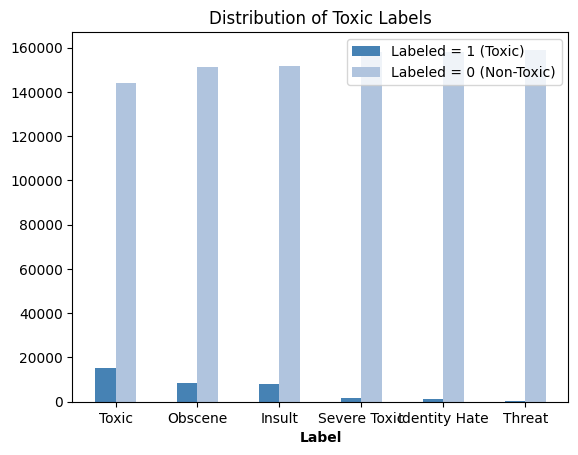

In [ ]:
# Set the width of bars in the bar plot
barWidth = 0.25

# Calculate counts of comments labeled as toxic (1) and non-toxic (0) for each target label
bars1 = [sum(raw_df['toxic'] == 1), sum(raw_df['obscene'] == 1), sum(raw_df['insult'] == 1),
         sum(raw_df['severe_toxic'] == 1), sum(raw_df['identity_hate'] == 1), sum(raw_df['threat'] == 1)]
bars2 = [sum(raw_df['toxic'] == 0), sum(raw_df['obscene'] == 0), sum(raw_df['insult'] == 0),
         sum(raw_df['severe_toxic'] == 0), sum(raw_df['identity_hate'] == 0), sum(raw_df['threat'] == 0)]

# Set bar positions for each label
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]

# Create the bar plot to display distribution of toxic and non-toxic labels
plt.bar(r1, bars1, color='steelblue', width=barWidth, label='Labeled = 1 (Toxic)')
plt.bar(r2, bars2, color='lightsteelblue', width=barWidth, label='Labeled = 0 (Non-Toxic)')

# Add labels and title for the plot
plt.xlabel('Label', fontweight='bold')
plt.xticks([r + barWidth / 2 for r in range(len(bars1))],
           ['Toxic', 'Obscene', 'Insult', 'Severe Toxic', 'Identity Hate', 'Threat'])
plt.title('Distribution of Toxic Labels')
plt.legend()
plt.show()

<Axes: title={'center': 'Label Distribution'}>

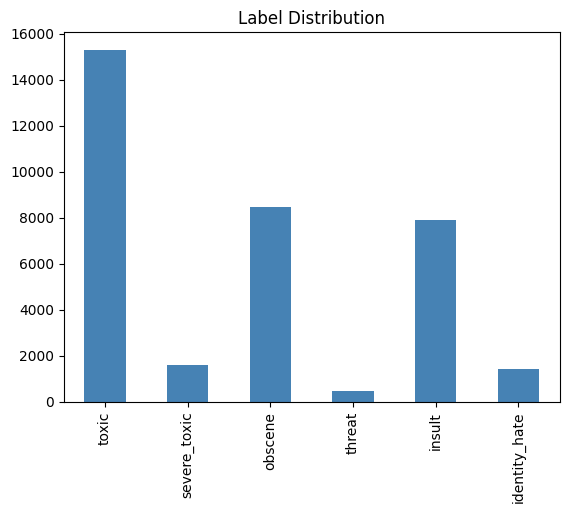

In [ ]:
# Sum each label column to find the total number of positive cases for each label
label_counts = raw_df[target_cols].sum()

# Plot a bar chart to display the distribution of each toxic label
label_counts.plot(kind='bar', title='Label Distribution', color='steelblue')

Comment Length Statistics:
Mean: 67.27352714465661
Median: 36.0
Max: 1411
Min: 1
90th Percentile: 152.0
95th Percentile: 230.0


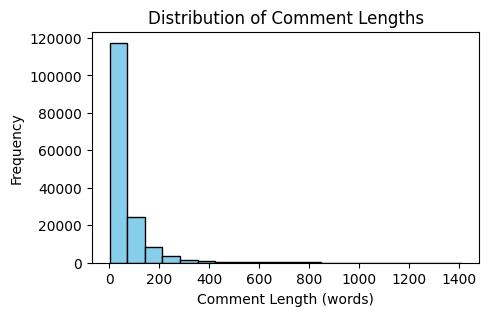

In [ ]:
# Calculate the length of each comment in terms of word count
comment_lengths = raw_df['comment_text'].apply(lambda x: len(x.split()))

# Display basic statistics for comment lengths
print("Comment Length Statistics:")
print(f"Mean: {comment_lengths.mean()}")
print(f"Median: {comment_lengths.median()}")
print(f"Max: {comment_lengths.max()}")
print(f"Min: {comment_lengths.min()}")
print(f"90th Percentile: {comment_lengths.quantile(0.90)}")
print(f"95th Percentile: {comment_lengths.quantile(0.95)}")

# Plot the distribution of comment lengths
plt.figure(figsize=(5, 3))
plt.hist(comment_lengths, bins=20, color="skyblue", edgecolor="black")
plt.xlabel("Comment Length (words)")
plt.ylabel("Frequency")
plt.title("Distribution of Comment Lengths")
plt.show()

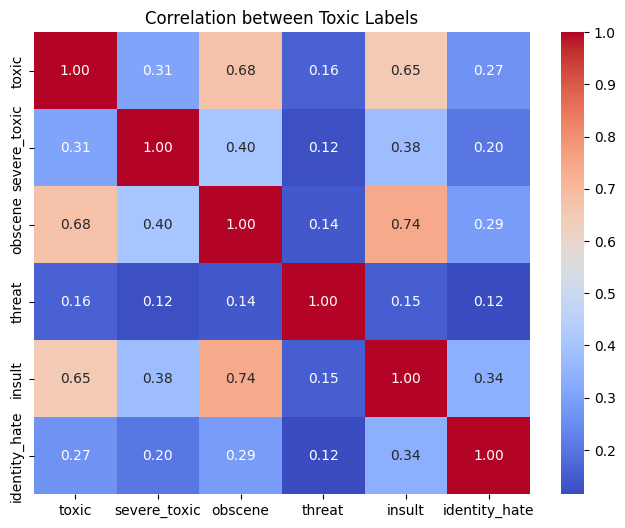

In [ ]:
# Compute the correlation matrix for target labels to assess relationships between them
label_corr = raw_df[target_cols].corr()

# Plot a heatmap to visualize the correlation between different toxic labels
plt.figure(figsize=(8, 6))
sns.heatmap(label_corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation between Toxic Labels")
plt.show()

In [ ]:
# Function to generate a word cloud for a given text
def generate_wordcloud(text, title):
    """
    Generate and display a word cloud for the given text.

    Parameters:
    text (str): The text to generate the word cloud from.
    title (str): The title for the word cloud plot.
    """
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(title)
    plt.show()

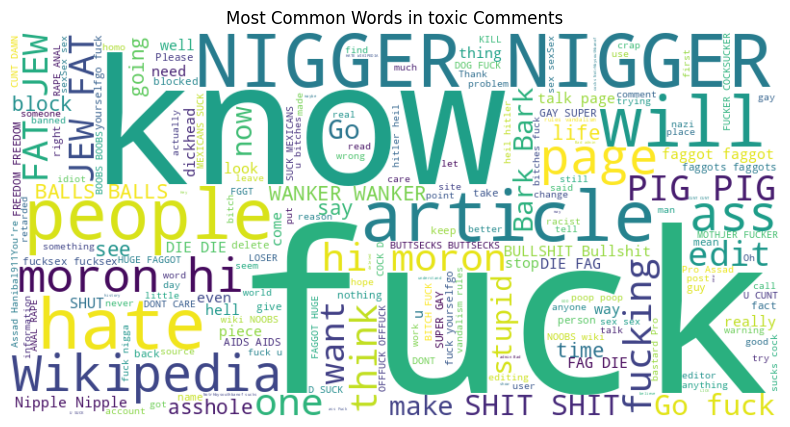

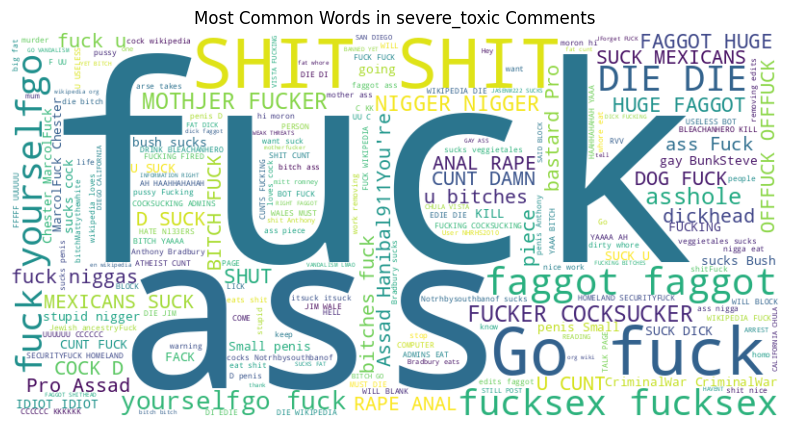

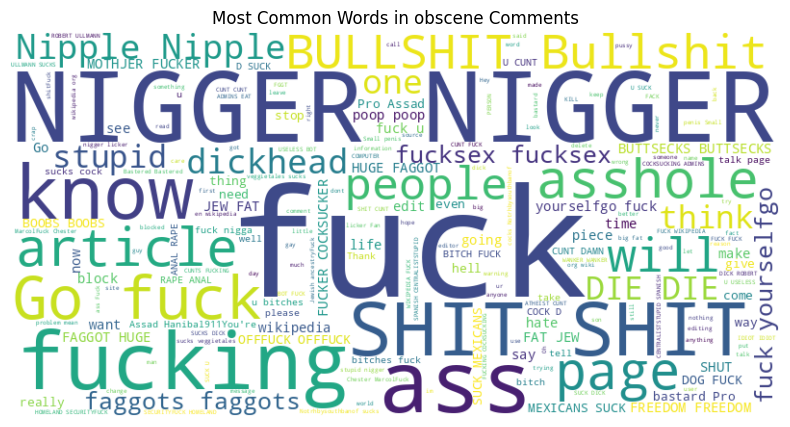

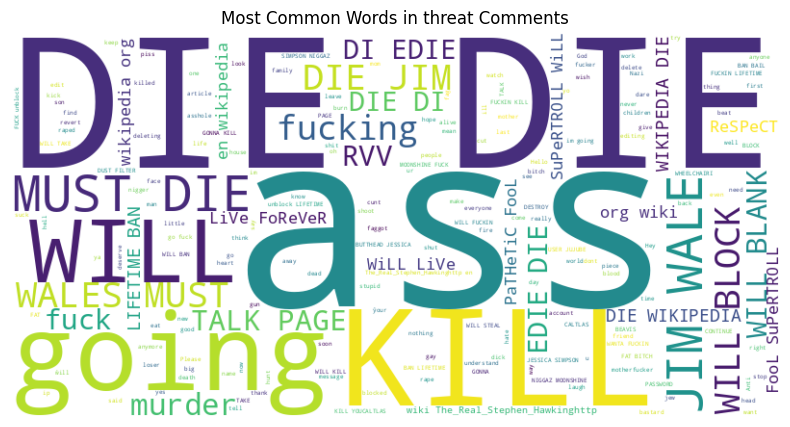

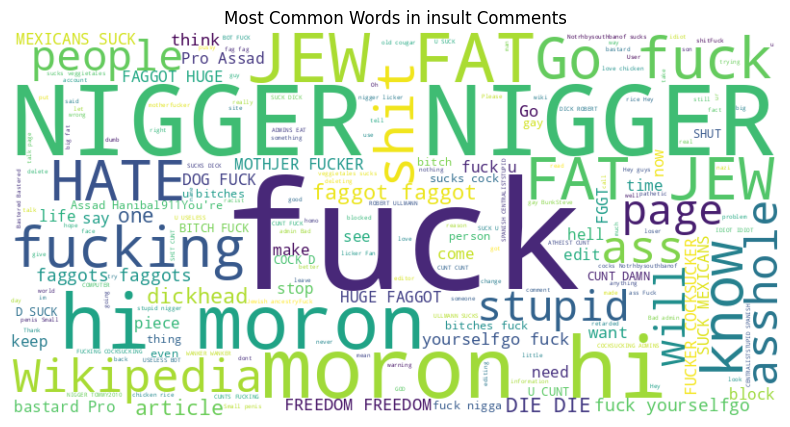

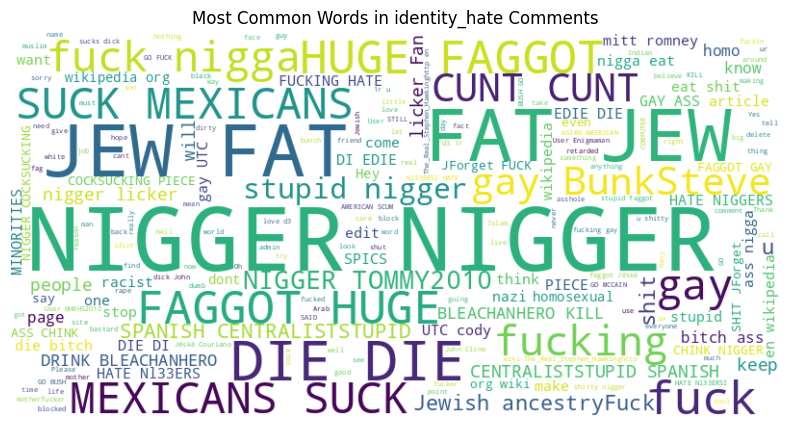

In [ ]:
# Generate and display word clouds for each toxic label
for col in target_cols:
    toxic_text = ' '.join(raw_df[raw_df[col] == 1]['comment_text'].values)
    generate_wordcloud(toxic_text, f"Most Common Words in {col} Comments")

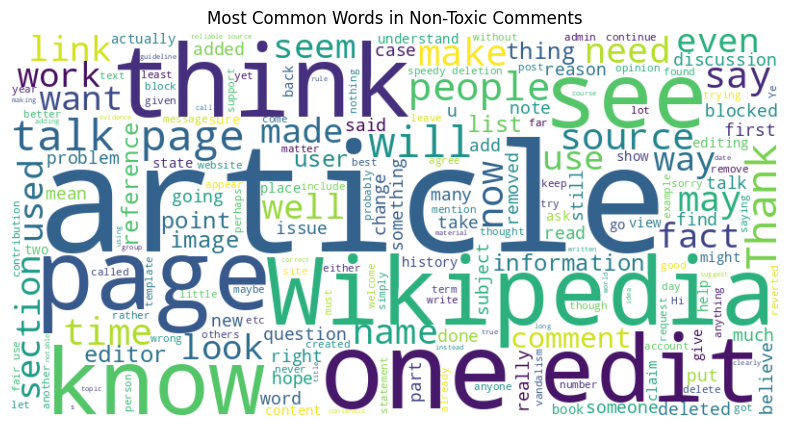

In [ ]:
# Generate and display word cloud for non-toxic comments
non_toxic_comments = raw_df[(raw_df[target_cols] == 0).all(axis=1)]['comment_text'].values
non_toxic_text = ' '.join(non_toxic_comments)
generate_wordcloud(non_toxic_text, "Most Common Words in Non-Toxic Comments")

# Machine Learning Approaches for Toxic Comment Classification

In this notebook, we explore various machine learning approaches to classify comments based on toxicity levels. Each method leverages different algorithms and architectures, showcasing a range of techniques from classical machine learning to advanced deep learning models.

## 1. Classical Machine Learning Algorithms
Three classical machine learning algorithms are implemented to establish a baseline performance for the toxic comment classification task:
- **Logistic Regression**: A simple yet effective linear model for binary classification tasks, which can be extended to multi-label classification by treating each label independently.
- **Random Forest**: An ensemble learning method that constructs multiple decision trees during training and outputs the mode of the classes for classification, helping to improve prediction accuracy and control overfitting.
- **Support Vector Machine (SVM)**: A powerful classifier that finds the optimal hyperplane to separate different classes in a high-dimensional space, capable of handling multi-label classification through appropriate adaptations.

These algorithms serve as benchmarks for evaluating the effectiveness of more complex models.

## 2. BiLSTM Model
The Bidirectional Long Short-Term Memory (BiLSTM) model is employed to capture contextual information from comments in both forward and backward directions. This approach enhances the understanding of the text by considering the relationships between words in a sequence, making it particularly suitable for natural language processing tasks. The BiLSTM model integrates pre-trained embeddings, LSTM layers, and fully connected layers to predict multiple toxicity labels for each comment.

## 3. DistilBERT Model
The DistilBERT model, a smaller and faster version of BERT, is utilized for its state-of-the-art performance in various NLP tasks. By leveraging transformer architecture, DistilBERT captures intricate language patterns and contextual information more effectively than traditional models. This section involves fine-tuning DistilBERT on the toxic comment dataset, enabling it to classify comments into multiple toxicity categories.

Through these diverse methodologies, we aim to analyze the strengths and weaknesses of each approach, providing insights into their respective performances in tackling the challenging task of toxic comment classification.


## Classical Machine Learning Algorithms

### Text Preprocessing and Feature Extraction for Classical ML

In this section, we focus on preprocessing the text data and transforming it into numerical features suitable for classical machine learning algorithms. Effective text preprocessing is crucial for improving model performance, especially in natural language processing tasks.

#### 1. Downloading Essential NLTK Resources
We begin by downloading essential Natural Language Toolkit (NLTK) resources required for text preprocessing:
- **WordNet**: Used for lemmatization, which reduces words to their base or root form.
- **Stop Words**: A list of common words (e.g., "and", "the") that are often filtered out to focus on more meaningful terms.
- **Punkt Tokenizer**: A tokenizer for splitting text into words and sentences.

#### 2. Tokenization Function
A custom function named `tokenize` is defined to process the text. This function performs the following steps:
- Converts the text to lowercase and removes punctuation, numbers, and non-ASCII characters.
- Splits the text into individual words.
- Lemmatizes the words to their base forms and filters out any words shorter than three characters.

This comprehensive tokenization process ensures that the input text is clean and normalized for further analysis.

#### 3. TF-IDF Vectorization
We utilize the TF-IDF (Term Frequency-Inverse Document Frequency) vectorizer to convert the preprocessed text data into numerical features. This technique helps in:
- Reducing the impact of frequently occurring words, which might not carry significant meaning in the context of toxicity classification.
- Highlighting important words based on their relevance across documents.

##### Key Parameters of the TF-IDF Vectorizer:
- **ngram_range**: Set to (1, 1) to use unigrams only, focusing on single words for tokenization.
- **analyzer**: Specifies word-level tokenization.
- **tokenizer**: Applies the custom `tokenize` function for preprocessing.
- **stop_words**: Filters out common English stop words.
- **strip_accents**: Normalizes accents for consistent tokenization.
- **use_idf**: Enables inverse document frequency for weighting.
- **min_df**: Ignores terms that appear in fewer than 10 documents.

The TF-IDF vectorizer is then applied to transform both the training and test data. This prepares the data for input into the classical machine learning models.

#### 4. Feature Names
Finally, we display a sample of feature names generated by the TF-IDF vectorizer after transformation, providing insight into the vocabulary extracted from the text data.

This preprocessing and feature extraction step is essential for the subsequent application of classical machine learning algorithms to classify comment toxicity effectively.


In [ ]:
# Download essential NLTK resources for text preprocessing
nltk.download('wordnet')     # WordNet lemmatizer dictionary
nltk.download('stopwords')   # List of stop words for filtering common words
nltk.download('punkt')       # Tokenizer for word and sentence tokenization

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
def tokenize(text):
    """
    Tokenize text by removing punctuation, numbers, and non-ASCII characters.
    Normalize to lowercase, lemmatize words, and filter out words shorter than 3 characters.

    Parameters:
    text (str): Input text to be tokenized and processed.

    Returns:
    list: A list of processed words after tokenization and lemmatization.
    """
    # Convert text to lowercase and remove punctuation and numbers
    text = text.lower()
    regex = re.compile(f"[{re.escape(string.punctuation)}0-9\\r\\t\\n]")
    nopunct = regex.sub(" ", text)

    # Split text into words and remove non-ASCII characters
    words = nopunct.split()
    words = [word.encode('ascii', 'ignore').decode('ascii') for word in words]

    # Lemmatize words and filter out words shorter than 3 characters
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words if len(word) > 2]

    return words

In [ ]:
# Benchmarking Vectorizers

# Initialize TFIDF Vectorizer to transform text data into numerical features
# TFIDF reduces the impact of frequently occurring words, improving model performance
vector = TfidfVectorizer(
    ngram_range=(1, 1),      # Use unigrams only for tokenization
    analyzer='word',         # Analyze by word-level tokenization
    tokenizer=tokenize,      # Apply custom tokenize function
    stop_words='english',    # Remove common English stop words
    strip_accents='unicode', # Normalize accents for consistent tokenization
    use_idf=True,            # Enable inverse document frequency for weighting
    min_df=10                # Ignore terms with frequency lower than 10
)

In [ ]:
# Apply the TFIDF vectorizer to transform training and test data
X_train = vector.fit_transform(raw_df['comment_text'])  # Fit and transform on training data
X_test = vector.transform(test_df['comment_text'])      # Transform test data using the fitted vectorizer

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:406: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'wa'] not in stop_words.
  warnings.warn(


In [ ]:
# Display a sample of feature names generated by the TFIDF vectorizer after transformation
print("Sample features after TFIDF transformation:\n", vector.get_feature_names_out()[0:10])

Sample features after TFIDF transformation:
 ['aaa' 'aap' 'aardvark' 'aaron' 'ab' 'aba' 'abandon' 'abandoned'
 'abandoning' 'abandonment']


### Implementation and evaluation of three classical machine learning classifiers

In this section, we implement and evaluate three classical machine learning classifiers to address the multi-label classification problem of toxic comments. Each classifier will be assessed based on its performance in predicting toxicity labels, allowing us to identify the most effective model.

#### 1. Classifier Initialization
We initialize the following classifiers:
- **Multinomial Naive Bayes (MNB)**: A probabilistic classifier that applies Bayes' theorem, particularly suited for text classification tasks where the feature vectors represent word counts.
- **Logistic Regression (LR)**: A widely-used statistical model for binary and multi-class classification problems that estimates probabilities using a logistic function.
- **Linear Support Vector Classifier (LinearSVC)**: An implementation of the Support Vector Machine algorithm designed for linear classification, effective in high-dimensional spaces.

#### 2. Cross-Validation
To evaluate the performance of each classifier, we implement a cross-validation procedure:
- **Function Definition**: A function named `cross_validation_score` is defined to perform 10-fold cross-validation for each target label, calculating the F1 score and Recall score.
- **Score Calculation**: We gather cross-validation results for each classifier and compile them into a single DataFrame for comparative analysis.

#### 3. Performance Visualization
After calculating the scores, we visualize the results:
- **Box Plots**: Box plots are created to compare the F1 scores and Recall scores across the different classifiers. These visualizations help in understanding the distribution and variability of the performance metrics.

#### 4. Evaluation Metrics
A function named `evaluation_metrics` is defined to calculate and log evaluation metrics for each target label using the classifiers:
- **Metrics Included**: F1 scores, Recall scores, and confusion matrices are computed to assess the classifiers' performance.
- **Hamming Loss**: The Hamming loss is calculated for each model, providing insight into the number of incorrect label predictions.

#### 5. Hyperparameter Tuning
We perform hyperparameter tuning using GridSearchCV for each classifier:
- **Tuning Parameters**: Different hyperparameter settings are explored to identify the optimal configuration for each model.
- **Best Model Selection**: The best hyperparameters are printed, and the classifiers are retrained using these optimal settings.

#### 6. Predictions and Submission
After training the best-performing model, predictions are generated for the test dataset:
- **Probability Calculation**: The decision function outputs are transformed into probabilities using the sigmoid function.
- **Submission File**: Finally, the predicted probabilities are stored in a submission DataFrame, which is saved as a CSV file for submission.

Through this comprehensive evaluation and comparison of classical machine learning models, we aim to identify the most effective approach for toxic comment classification.


In [ ]:
# Initialize classifiers for model benchmarking
clf1 = MultinomialNB()           # Naive Bayes classifier suitable for text data
clf2 = LogisticRegression()       # Logistic Regression classifier for binary/multi-class classification
clf3 = LinearSVC()                # Linear Support Vector Classifier for high-dimensional data

In [ ]:
def cross_validation_score(classifier, X_train, y_train):
    """
    Perform cross-validation for each target label and calculate F1 and Recall scores.

    Parameters:
    classifier: The machine learning classifier to be evaluated.
    X_train: The feature matrix for training data.
    y_train: The target labels for training data.

    Returns:
    list: A list of cross-validation results with model name, label, mean F1 score, and mean Recall score.
    """
    results = []
    name = classifier.__class__.__name__.split('.')[-1]

    for label in target_cols:
        # Perform 10-fold cross-validation for F1 and Recall scores
        f1 = cross_val_score(classifier, X_train, y_train[label], cv=10, scoring='f1')
        recall = cross_val_score(classifier, X_train, y_train[label], cv=10, scoring='recall')
        results.append([name, label, f1.mean(), recall.mean()])

    return results

In [ ]:
# Calculate and store cross-validation scores for each classifier
results_clf1 = pd.DataFrame(cross_validation_score(clf1, X_train, raw_df))  # Scores for MultinomialNB
results_clf2 = pd.DataFrame(cross_validation_score(clf2, X_train, raw_df))  # Scores for Logistic Regression
results_clf3 = pd.DataFrame(cross_validation_score(clf3, X_train, raw_df))  # Scores for Linear SVC

In [ ]:
# Combine cross-validation results from all classifiers into a single DataFrame
results = pd.concat([results_clf1, results_clf2, results_clf3])

# Rename columns for clarity
results.columns = ['Model', 'Label', 'F1', 'Recall']

# Reset index for a clean display and show summary of F1 and Recall scores
results_summary = results.reset_index(drop=True)
print(results_summary[['Model', 'Label', 'F1', 'Recall']])

                 Model          Label        F1    Recall
0        MultinomialNB          toxic  0.635676  0.481952
1        MultinomialNB   severe_toxic  0.044559  0.023188
2        MultinomialNB        obscene  0.621764  0.468694
3        MultinomialNB         threat  0.000000  0.000000
4        MultinomialNB         insult  0.511917  0.367528
5        MultinomialNB  identity_hate  0.015346  0.007832
6   LogisticRegression          toxic  0.731511  0.612004
7   LogisticRegression   severe_toxic  0.351301  0.255173
8   LogisticRegression        obscene  0.748133  0.638422
9   LogisticRegression         threat  0.220225  0.131649
10  LogisticRegression         insult  0.637891  0.524689
11  LogisticRegression  identity_hate  0.318452  0.208561
12           LinearSVC          toxic  0.759480  0.680790
13           LinearSVC   severe_toxic  0.353521  0.265189
14           LinearSVC        obscene  0.774655  0.695707
15           LinearSVC         threat  0.328468  0.225931
16           L

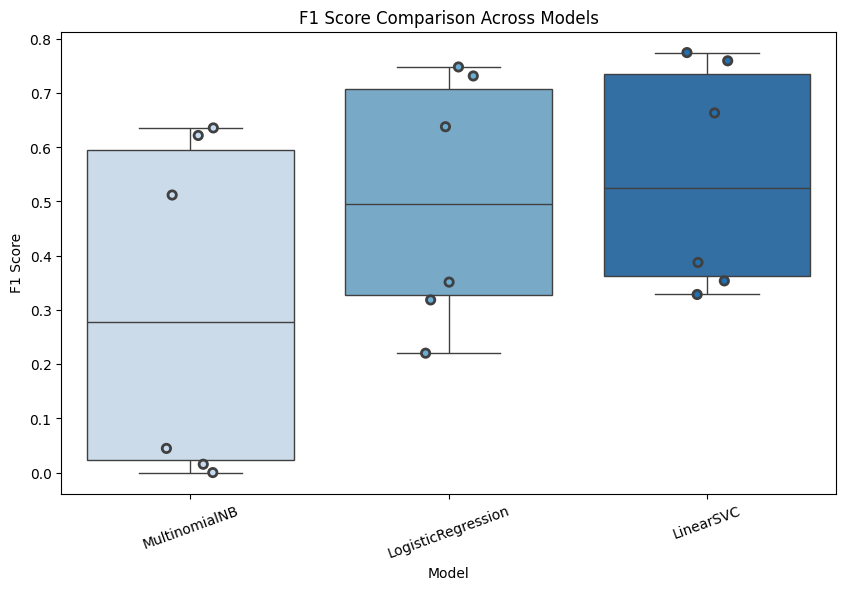

In [ ]:
# Visualize F1 Score distribution for each model using a box plot
plt.figure(figsize=(10, 6))

# Create a box plot for F1 Score comparison across models
sns.boxplot(x='Model', y='F1', data=results_summary, hue='Model', palette="Blues", dodge=False, legend=False)

# Overlay individual data points using a strip plot
sns.stripplot(x='Model', y='F1', data=results_summary, hue='Model', size=6, jitter=True, edgecolor="auto", linewidth=2, palette="Blues", legend=False)

# Customize plot aesthetics
plt.xticks(rotation=20)
plt.title("F1 Score Comparison Across Models")
plt.ylabel("F1 Score")
plt.xlabel("Model")
plt.show()

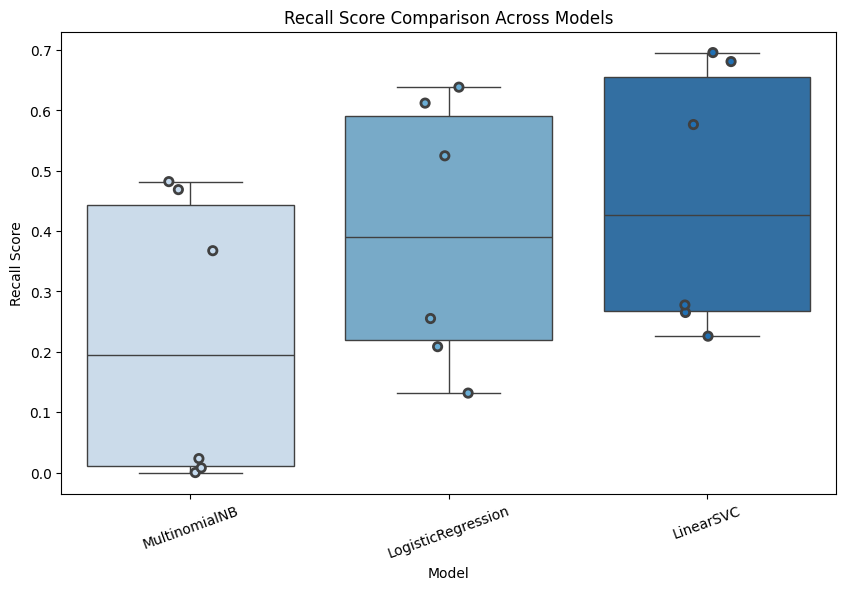

In [ ]:
# Visualize Recall Score distribution for each model using a box plot
plt.figure(figsize=(10, 6))

# Create a box plot for Recall Score comparison across models
sns.boxplot(x='Model', y='Recall', data=results_summary, hue='Model', palette="Blues", dodge=False, legend=False)

# Overlay individual data points using a strip plot
sns.stripplot(x='Model', y='Recall', data=results_summary, hue='Model', size=6, jitter=True, edgecolor="auto", linewidth=2, palette="Blues", legend=False)

# Customize plot aesthetics
plt.xticks(rotation=20)
plt.title("Recall Score Comparison Across Models")
plt.ylabel("Recall Score")
plt.xlabel("Model")
plt.show()

In [ ]:
def evaluation_metrics(classifier, X_train, y_train, X_test, y_test):
    """
    Calculate evaluation metrics for each target label using a classifier.

    Parameters:
    classifier: The machine learning classifier to be evaluated.
    X_train: Feature matrix for training data.
    y_train: Target labels for training data.
    X_test: Feature matrix for testing data.
    y_test: Target labels for testing data.

    Returns:
    tuple: A list of metrics (F1, Recall, Confusion Matrix) for each label and a list of Hamming Loss values.
    """
    metrics = []
    ham_loss = []
    classifier_name = classifier.__class__.__name__.split('.')[-1]

    # DataFrame to store predictions for each label
    predictions = pd.DataFrame()
    predictions['id'] = sub_df['id']

    # Loop through each target label
    for label in target_cols:
        classifier.fit(X_train, y_train[label])
        predicted_label = classifier.predict(X_test)
        predictions[label] = predicted_label

        # Calculate weighted Recall and F1 scores, ignoring missing labels (-1)
        recall = recall_score(y_test[y_test[label] != -1][label], predicted_label[y_test[label] != -1], average="weighted")
        f1 = f1_score(y_test[y_test[label] != -1][label], predicted_label[y_test[label] != -1], average="weighted")

        # Compute confusion matrix for each label
        confusion_mat = confusion_matrix(y_test[y_test[label] != -1][label], predicted_label[y_test[label] != -1])

        metrics.append([classifier_name, label, f1, recall, confusion_mat])

    # Calculate Hamming Loss across all labels
    hloss_value = hamming_loss(sub_df[sub_df['toxic'] != -1].iloc[:, 1:7],
                               predictions[sub_df['toxic'] != -1].iloc[:, 1:7])
    ham_loss.append([classifier_name, hloss_value])

    return metrics, ham_loss

In [ ]:
# Evaluate metrics for each classifier on the training and test datasets
scores_1, hloss_1 = evaluation_metrics(clf1, X_train, raw_df, X_test, sub_df)  # Metrics for MultinomialNB
scores_2, hloss_2 = evaluation_metrics(clf2, X_train, raw_df, X_test, sub_df)  # Metrics for Logistic Regression
scores_3, hloss_3 = evaluation_metrics(clf3, X_train, raw_df, X_test, sub_df)  # Metrics for Linear SVC

In [ ]:
# Convert the evaluation metrics for each classifier into DataFrames
scores_1 = pd.DataFrame(scores_1)  # Metrics for MultinomialNB
scores_2 = pd.DataFrame(scores_2)  # Metrics for Logistic Regression
scores_3 = pd.DataFrame(scores_3)  # Metrics for Linear SVC

# Concatenate all DataFrames into a single DataFrame for comparison
all_scores = pd.concat([scores_1, scores_2, scores_3])

# Rename columns for clarity and consistency
all_scores.columns = ['Model', 'Label', 'F1 score', 'Recall', 'Confusion Matrix']

# Reset index for a clean display
all_scores_mod = all_scores.reset_index(drop=True)

# Display summary of metrics for each model and label
all_scores_mod[['Model', 'Label', 'F1 score', 'Recall', 'Confusion Matrix']]

,Model,Label,F1 score,Recall,Confusion Matrix
0,MultinomialNB,toxic,0.930782,0.935150,"[[56599, 1289], [2860, 3230]]"
1,MultinomialNB,severe_toxic,0.992075,0.994404,"[[63599, 12], [346, 21]]"
2,MultinomialNB,obscene,0.957755,0.962893,"[[59931, 356], [2018, 1673]]"
3,MultinomialNB,threat,0.995056,0.996702,"[[63767, 0], [211, 0]]"
4,MultinomialNB,insult,0.953389,0.960143,"[[60171, 380], [2170, 1257]]"
5,MultinomialNB,identity_hate,0.983408,0.988887,"[[63265, 1], [710, 2]]"
6,LogisticRegression,toxic,0.936570,0.935181,"[[55506, 2382], [1765, 4325]]"
7,LogisticRegression,severe_toxic,0.992829,0.993138,"[[63422, 189], [250, 117]]"
8,LogisticRegression,obscene,0.964395,0.965988,"[[59532, 755], [1421, 2270]]"
9,LogisticRegression,threat,0.995762,0.996389,"[[63706, 61], [170, 41]]"


<Axes: title={'center': 'Metrics for Logistic Regression classifier'}, xlabel='Label'>

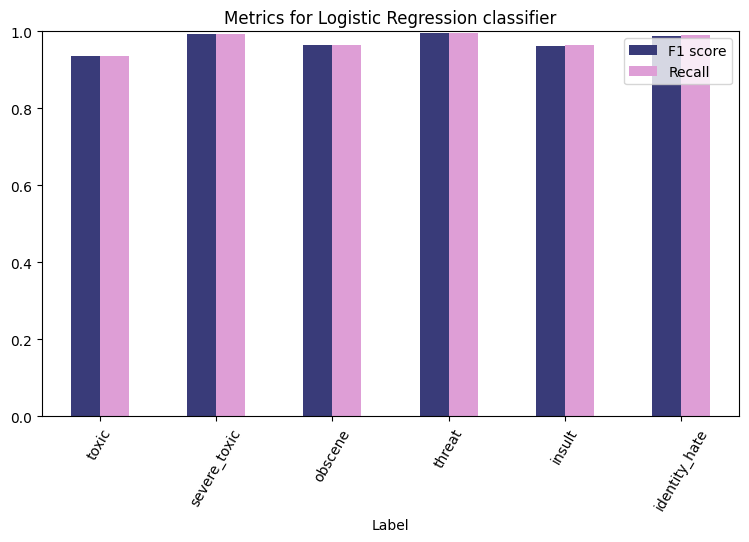

In [ ]:
# Filter the combined DataFrame for Logistic Regression metrics only
bar_logreg = all_scores[all_scores['Model'] == "LogisticRegression"]

# Set the index to the Label column for better readability in the plot
bar_logreg.set_index("Label", inplace=True)

# Plot a bar chart displaying F1 score and Recall for Logistic Regression across each label
bar_logreg[['F1 score', 'Recall']].plot(
    figsize=(9, 5),
    kind='bar',
    rot=60,
    ylim=(0.0, 1),
    title="Metrics for Logistic Regression classifier",
    colormap="tab20b"
)

<Axes: title={'center': 'Metrics for Multinomial Naive Bayes classifier'}, xlabel='Label'>

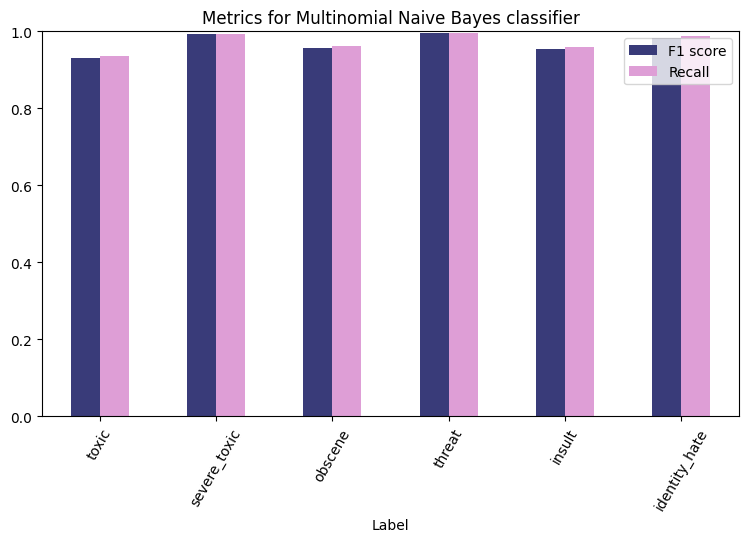

In [ ]:
# Filter the combined DataFrame for Multinomial Naive Bayes metrics only
bar_mnb = all_scores[all_scores['Model'] == "MultinomialNB"]

# Set the index to the Label column for better readability in the plot
bar_mnb.set_index("Label", inplace=True)

# Plot a bar chart displaying F1 score and Recall for Multinomial Naive Bayes across each label
bar_mnb[['F1 score', 'Recall']].plot(
    figsize=(9, 5),
    kind='bar',
    rot=60,
    ylim=(0.0, 1),
    title="Metrics for Multinomial Naive Bayes classifier",
    colormap="tab20b"
)

<Axes: title={'center': 'Metrics for LinearSVC classifier'}, xlabel='Label'>

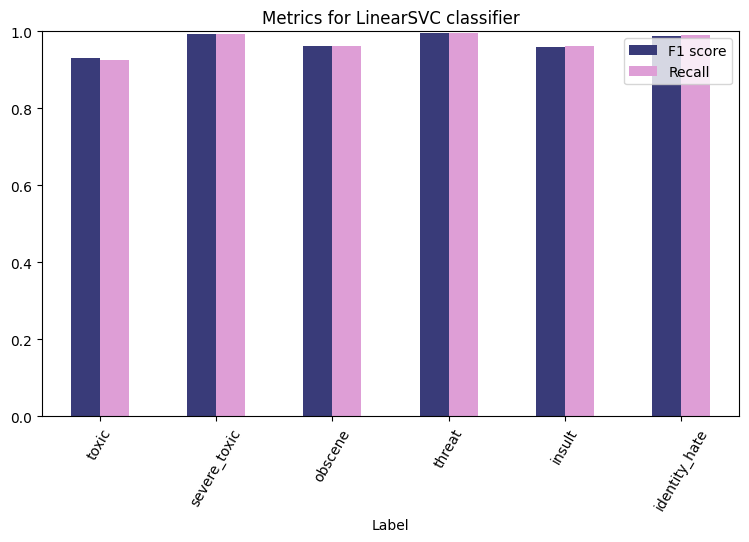

In [ ]:
# Filter the combined DataFrame for LinearSVC metrics only
bar_lsvc = all_scores[all_scores['Model'] == "LinearSVC"]

# Set the index to the Label column for better readability in the plot
bar_lsvc.set_index("Label", inplace=True)

# Plot a bar chart displaying F1 score and Recall for LinearSVC across each label
bar_lsvc[['F1 score', 'Recall']].plot(
    figsize=(9, 5),
    kind='bar',
    rot=60,
    ylim=(0.0, 1),
    title="Metrics for LinearSVC classifier",
    colormap="tab20b"
)

In [ ]:
def display_conf_matrix(matrix, ax, title=""):
    """
    Normalize and display a confusion matrix as a heatmap on a given axis.

    Parameters:
    matrix (ndarray): Confusion matrix to be normalized and displayed.
    ax (matplotlib.axes._subplots.AxesSubplot): Axis on which to display the heatmap.
    title (str): Title for the heatmap.

    The function normalizes the confusion matrix by rows, converts it to a heatmap, and annotates it.
    """
    # Normalize the confusion matrix by row
    matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

    # Display the normalized confusion matrix as a heatmap
    sns.heatmap(
        matrix,
        cmap='cool',
        xticklabels=("Non-toxic", "Toxic"),
        yticklabels=("Non-toxic", "Toxic"),
        fmt='.2f',
        linewidths=1.5,
        linecolor='orangered',
        annot=True,
        annot_kws={"size":14},
        ax=ax
    )
    ax.set_title(title, fontsize=14)
    ax.set_xlabel("Predicted", fontsize=12)
    ax.set_ylabel("True", fontsize=12)

In [ ]:
def build_conf_matrix(label):
    """
    Build and display confusion matrices for each model for a given label, arranged in a single row.

    Parameters:
    label (str): Target label for which to display confusion matrices for each model.

    This function iterates over three models to display the normalized confusion matrix for a specified label,
    with matrices displayed as subplots.
    """
    labels = {"toxic": 0, "severe_toxic": 1, "obscene": 2, "threat": 3, "insult": 4, "identity_hate": 5}
    index = labels[label]

    # Set up a figure with 3 subplots for displaying confusion matrices
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    fig.suptitle(f"Confusion Matrices for label: {label}", fontsize=16)

    # Iterate through each model's confusion matrix for the specified label
    for i, ax in zip(range(index, len(all_scores_mod), 6), axes.flatten()):
        model_name = all_scores_mod['Model'][i]
        matrix = all_scores_mod['Confusion Matrix'][i]

        # Display each confusion matrix on its respective subplot
        display_conf_matrix(matrix, ax=ax, title=model_name)

    # Adjust layout to fit the title and avoid overlap
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

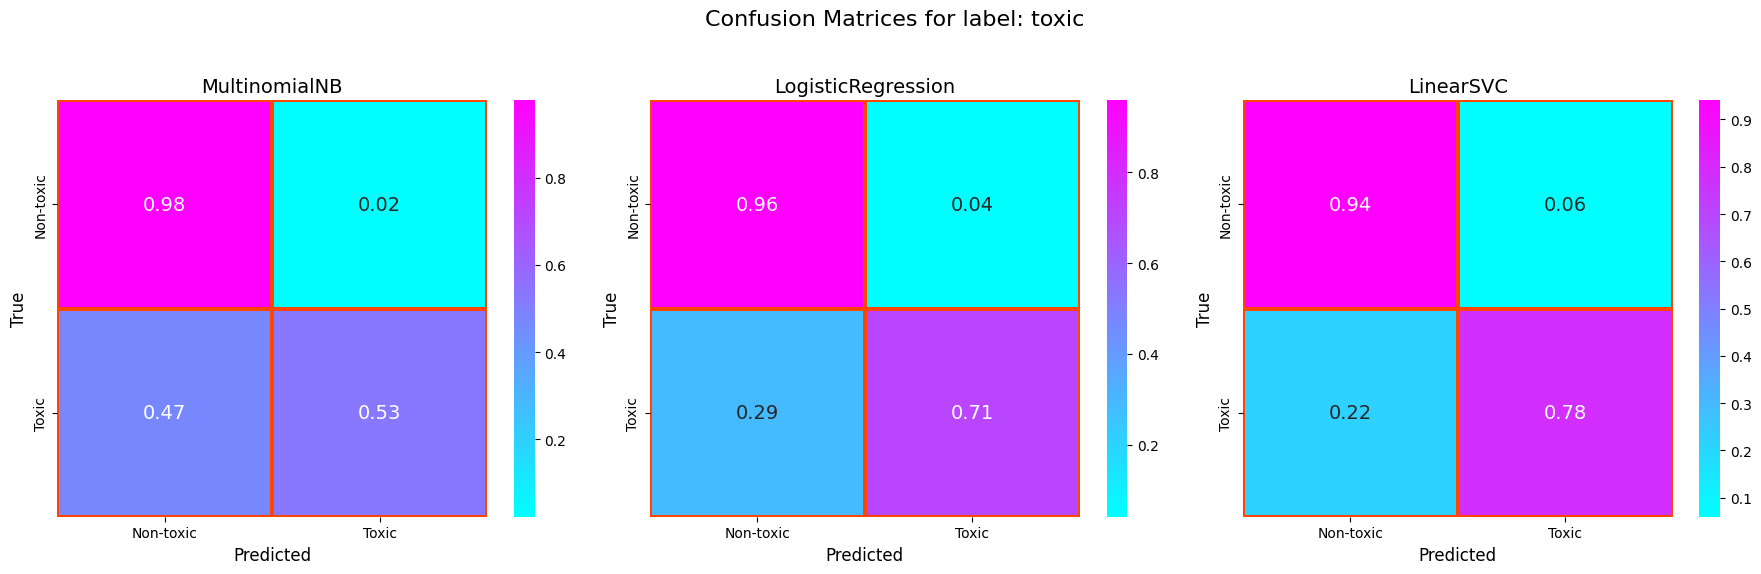

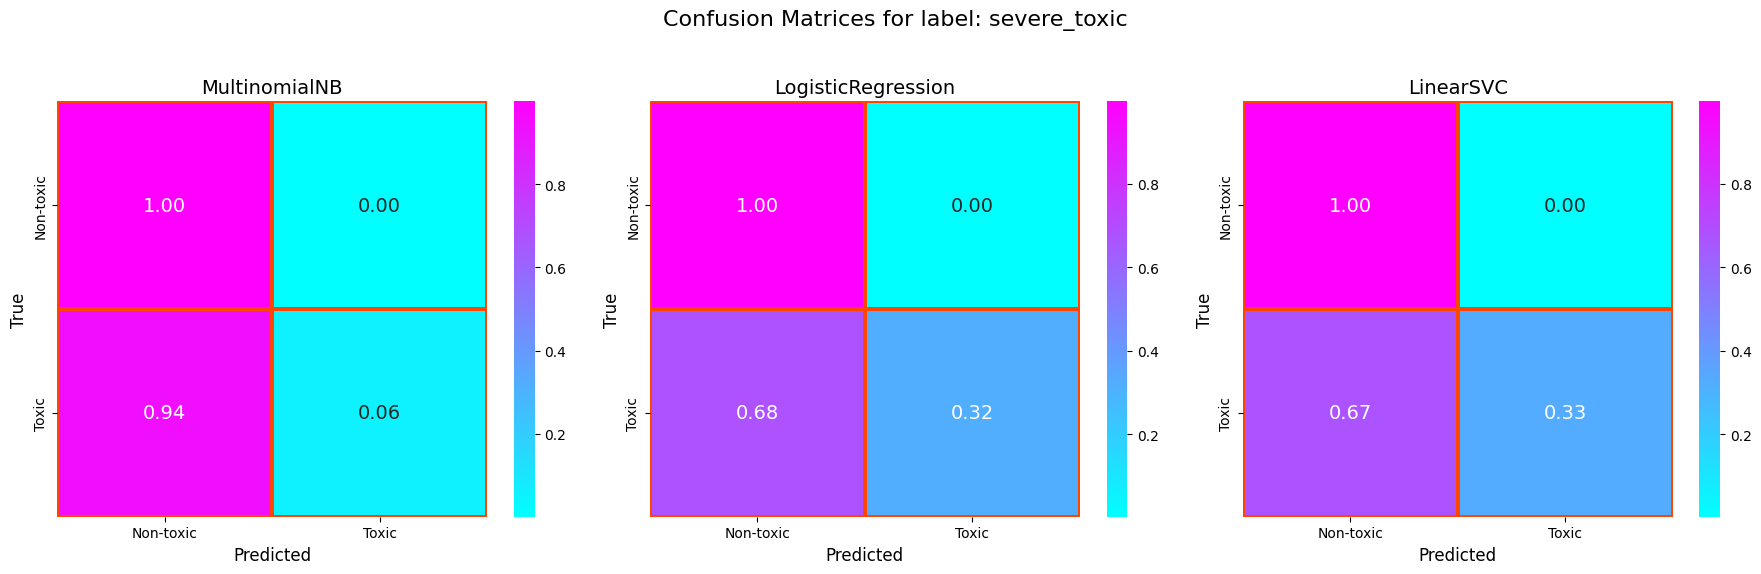

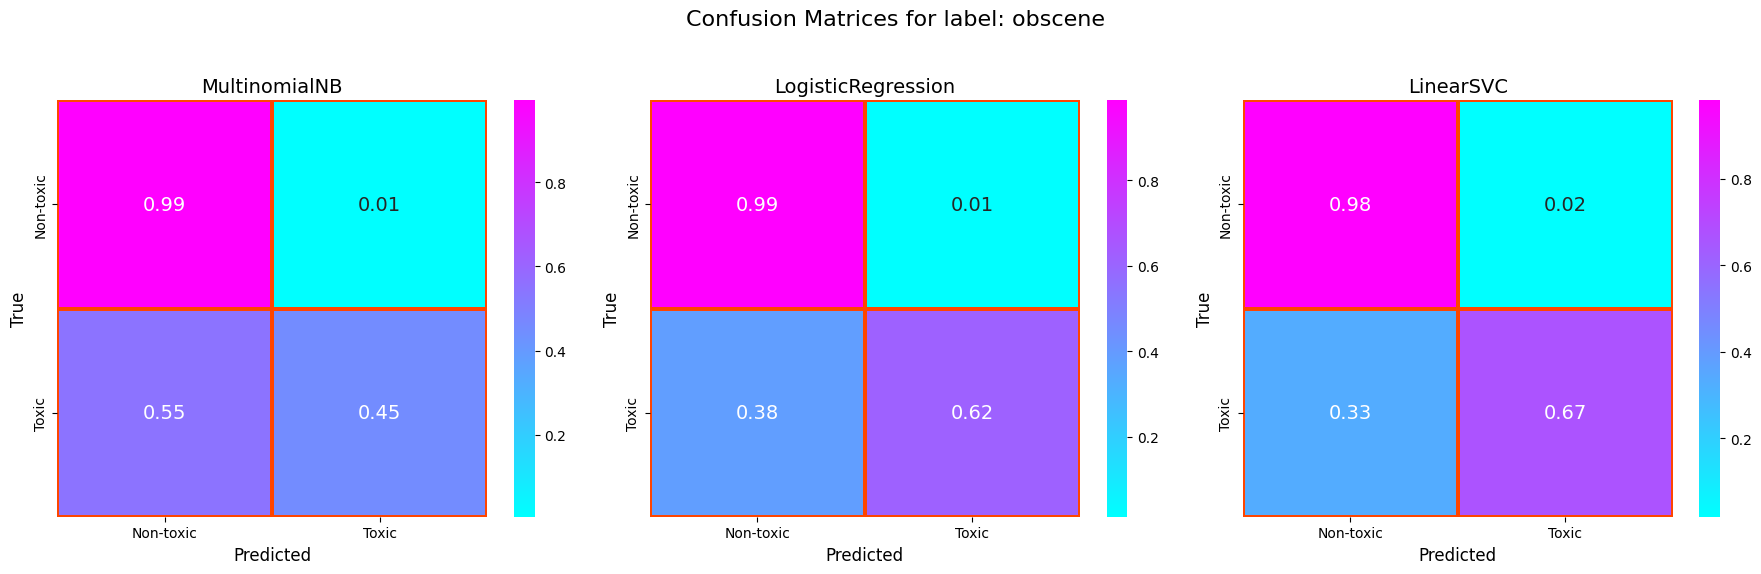

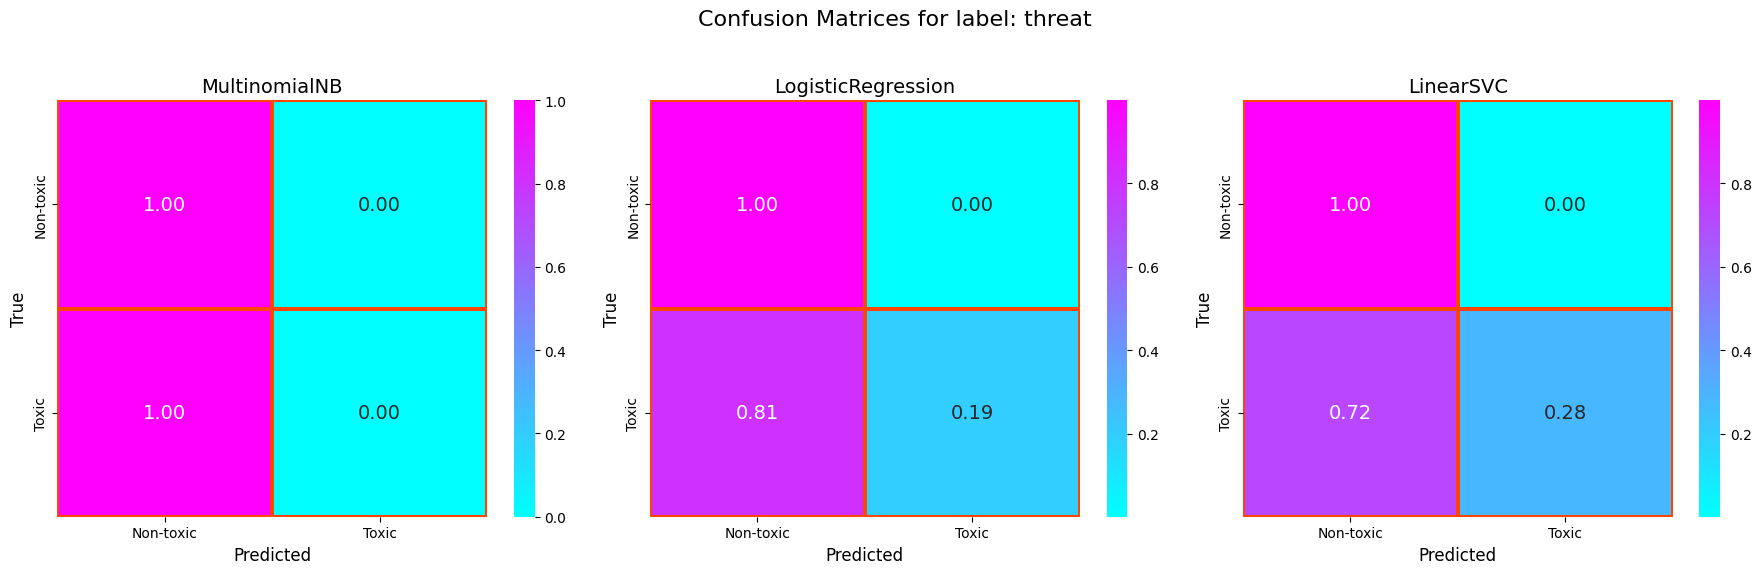

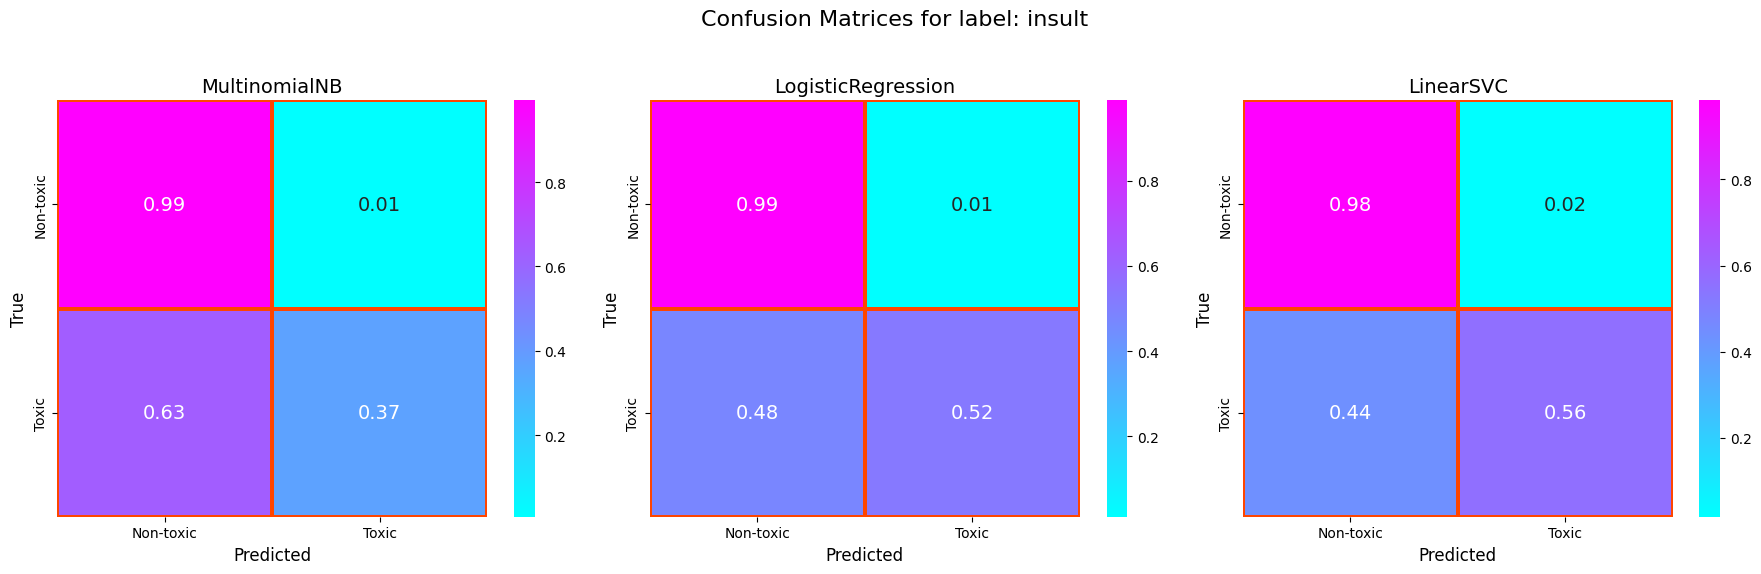

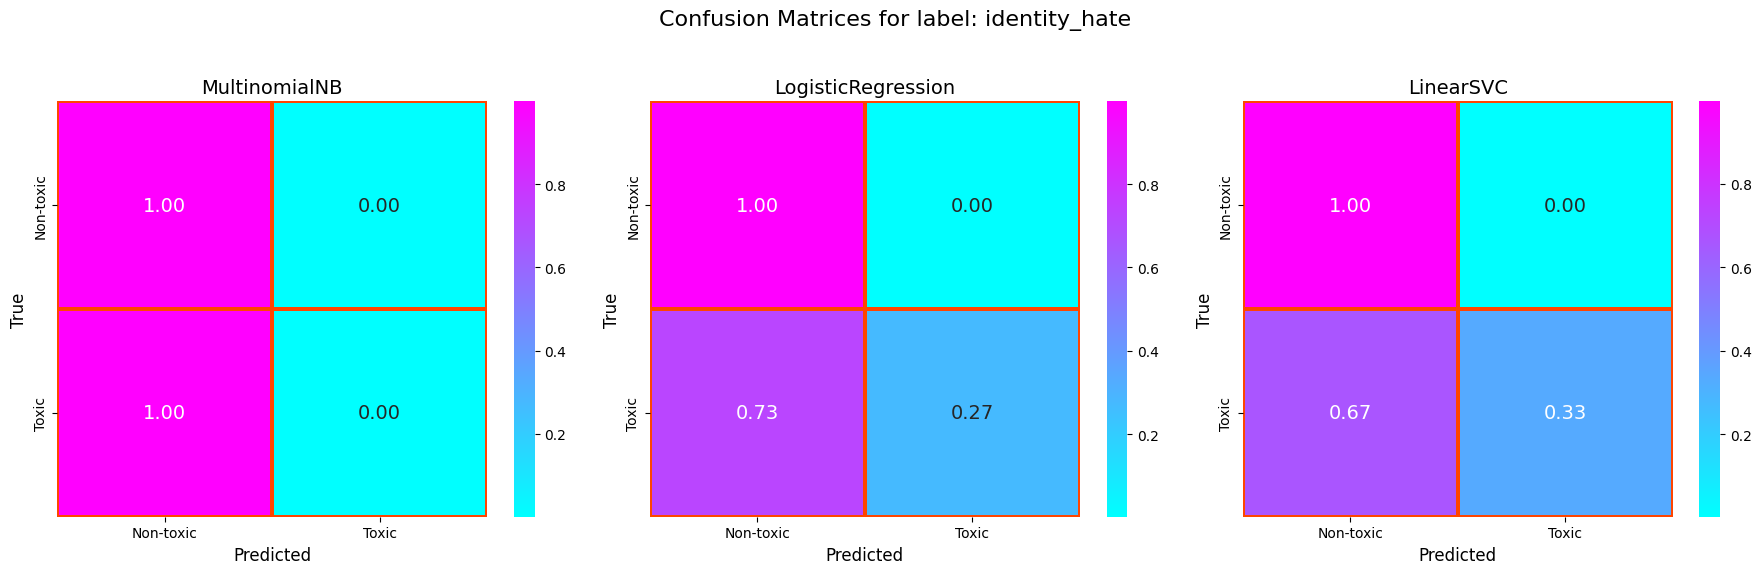

In [ ]:
# Iterate through each target label and display confusion matrices for each model
for label in target_cols:
    build_conf_matrix(label)

In [ ]:
# Convert Hamming loss results for each classifier into separate DataFrames
hloss_1_df = pd.DataFrame(hloss_1)  # Hamming loss for MultinomialNB
hloss_2_df = pd.DataFrame(hloss_2)  # Hamming loss for Logistic Regression
hloss_3_df = pd.DataFrame(hloss_3)  # Hamming loss for Linear SVC

# Concatenate the Hamming loss DataFrames into a single DataFrame
combined_hloss = pd.concat([hloss_1_df, hloss_2_df, hloss_3_df])

# Rename columns for clarity
combined_hloss.columns = ['Model', 'Hamming loss']

# Reset index for a clean display
combined_hloss_mod = combined_hloss.reset_index(drop=True)

# Display Hamming loss results for each model
combined_hloss_mod[['Model', 'Hamming loss']]

,Model,Hamming loss
0,MultinomialNB,0.026970
1,LogisticRegression,0.025790
2,LinearSVC,0.028489


In [ ]:
# Define the Logistic Regression classifier
clf2 = LogisticRegression()

# Define a grid of hyperparameters for tuning
parameter_grid = {
    'solver': ['newton-cg', 'lbfgs', 'liblinear'],  # Solvers to try for optimization
    'class_weight': [None, 'balanced']              # Class weight options for handling imbalanced data
}

# Set up Stratified K-Fold cross-validation for better generalization on imbalanced data
cross_validation = StratifiedKFold(n_splits=5)

# Initialize GridSearchCV to perform exhaustive search over the parameter grid
grid = GridSearchCV(clf2, param_grid=parameter_grid, cv=cross_validation, scoring='f1')

# Fit the grid search to find the best hyperparameters based on F1 score for the 'toxic' label
grid.fit(X_train, raw_df['toxic'])

# Output the best parameters and estimator identified by Grid Search
print('Best parameters found by Grid Search: {}'.format(grid.best_params_))
grid.best_estimator_

Best parameters found by Grid Search: {'class_weight': None, 'solver': 'lbfgs'}


LogisticRegression()

In [ ]:
# Define the LinearSVC classifier
clf3 = LinearSVC()

# Define a grid of hyperparameters for tuning
parameter_grid = {
    'class_weight': [None, 'balanced'],  # Options for handling class imbalance
    'C': [1, 5, 10]                      # Regularization strength parameter
}

# Set up Stratified K-Fold cross-validation for more robust evaluation on imbalanced data
cross_validation = StratifiedKFold(n_splits=5)

# Initialize GridSearchCV to perform an exhaustive search over the parameter grid
grid = GridSearchCV(clf3, param_grid=parameter_grid, cv=cross_validation, scoring='f1')

# Fit the grid search to find the best hyperparameters based on F1 score for the 'toxic' label
grid.fit(X_train, raw_df['toxic'])

# Output the best parameters and estimator identified by Grid Search
print('Best parameters found by Grid Search: {}'.format(grid.best_params_))
grid.best_estimator_

Best parameters found by Grid Search: {'C': 1, 'class_weight': None}


LinearSVC(C=1)

In [ ]:
# Define the Multinomial Naive Bayes classifier
clf1 = MultinomialNB()

# Define a grid of hyperparameters for tuning
parameter_grid = {
    'alpha': [0.1, 0.5, 1.0],  # Smoothing parameter to handle zero probabilities
    'fit_prior': [True, False]  # Option to learn class prior probabilities from the data
}

# Set up Stratified K-Fold cross-validation for balanced evaluation on imbalanced data
cross_validation = StratifiedKFold(n_splits=5)

# Initialize GridSearchCV to perform an exhaustive search over the parameter grid
grid = GridSearchCV(clf1, param_grid=parameter_grid, cv=cross_validation, scoring='f1')

# Fit the grid search to find the best hyperparameters based on F1 score for the 'toxic' label
grid.fit(X_train, raw_df['toxic'])

# Output the best parameters and estimator identified by Grid Search
print('Best parameters found by Grid Search: {}'.format(grid.best_params_))
grid.best_estimator_

Best parameters found by Grid Search: {'alpha': 0.1, 'fit_prior': True}


MultinomialNB(alpha=0.1)

In [ ]:
# Define the Multinomial Naive Bayes classifier with the best parameters from Grid Search
clf1 = MultinomialNB(
    alpha=0.1,          # Smoothing parameter to handle zero probabilities
    fit_prior=True      # Learn class prior probabilities from the data
)

# Define the Logistic Regression classifier with the best parameters from Grid Search
clf2 = LogisticRegression(
    C=1.0,              # Regularization strength
    class_weight=None,  # No class weighting for handling imbalanced data
    dual=False,         # Use the primal formulation (dual=False) for optimization
    fit_intercept=True, # Add a constant (bias) to the decision function
    intercept_scaling=1, # Scaling of intercept (only relevant if solver='liblinear')
    max_iter=100,       # Maximum number of iterations for convergence
    multi_class='auto', # Multi-class setting (choose automatically)
    n_jobs=None,        # No parallel jobs
    penalty='l2',       # L2 regularization
    random_state=None,  # No fixed seed for random state
    solver='lbfgs',     # Optimization algorithm
    tol=0.0001,         # Tolerance for stopping criteria
    verbose=0,          # No verbosity
    warm_start=False    # Do not reuse previous solution for fitting
)

# Define the Linear Support Vector Classifier with the best parameters from Grid Search
clf3 = LinearSVC(
    C=1,                # Regularization strength
    class_weight=None,  # No class weighting
    dual=True,          # Use dual formulation for the optimization problem
    fit_intercept=True, # Add a constant (bias) to the decision function
    intercept_scaling=1, # Scaling of intercept (only relevant if solver='liblinear')
    loss='squared_hinge', # Loss function to optimize
    max_iter=1000,      # Maximum number of iterations for convergence
    multi_class='ovr',  # One-vs-Rest strategy for multi-class classification
    penalty='l2',       # L2 regularization
    random_state=None,  # No fixed seed for random state
    tol=0.0001,         # Tolerance for stopping criteria
    verbose=0           # No verbosity
)

In [ ]:
# Initialize an empty list to store report cards for each tuned model
report_cards_tuned = []

# Iterate over each tuned model (MultinomialNB, Logistic Regression, and LinearSVC)
for model in [clf1, clf2, clf3]:
    training_time_values = []   # Track training time for each label
    predictions = pd.DataFrame() # Store predictions for each label
    predictions['id'] = sub_df['id']  # Assuming 'id' column is in sub_df for test labels
    f1_scores = []              # List to store F1 scores for each label
    recall_values = []          # List to store Recall scores for each label
    hlosses = []                # List to store Hamming Loss values

    # Iterate over each label in multi-label classification
    for label in target_cols:  # Assuming target_cols contains the label names
        start = timer()         # Start timer for training duration
        model.fit(X_train, raw_df[label])  # Fit model on the training data for each label
        training_time_values.append(timer() - start)  # Record training time

        predicted_label = model.predict(X_test)  # Predict on test data
        predictions[label] = predicted_label     # Store predictions for the current label

        # Calculate F1 and Recall scores, ignoring missing values (-1)
        f1_scores.append(f1_score(sub_df[sub_df[label] != -1][label],
                                  predicted_label[sub_df[label] != -1],
                                  average="weighted"))
        recall_values.append(recall_score(sub_df[sub_df[label] != -1][label],
                                          predicted_label[sub_df[label] != -1],
                                          average="weighted"))
        classifier_name = model.__class__.__name__

    # Calculate Hamming Loss across all labels for the classifier
    hloss = hamming_loss(sub_df[sub_df['toxic'] != -1].iloc[:, 1:7],
                         predictions[sub_df['toxic'] != -1].iloc[:, 1:7])

    # Compile report card for the current model with averaged scores and total training time
    report_card = [classifier_name, mean(f1_scores), mean(recall_values), hloss, sum(training_time_values)]

    # Append the results to the report cards list
    report_cards_tuned.append(report_card)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and wi

In [ ]:
# Convert the list of report cards into a DataFrame for better visualization
report_cards_tuned_df = pd.DataFrame(report_cards_tuned)

# Set column names for the report card DataFrame
report_cards_tuned_df.columns = ["Model", "F1 score", "Recall", "Hamming Loss", "Training_time"]

# Display the report card DataFrame with performance metrics for each model
report_cards_tuned_df

,Model,F1 score,Recall,Hamming Loss,Training_time
0,MultinomialNB,0.970253,0.972355,0.027645,0.307295
1,LogisticRegression,0.973211,0.974210,0.025790,12.261182
2,LinearSVC,0.971668,0.971495,0.028505,5.343993


In [ ]:
# Initialize the best-performing model (Logistic Regression with optimal hyperparameters)
best_model = LogisticRegression(
    C=1.0,
    class_weight=None,
    dual=False,
    fit_intercept=True,
    intercept_scaling=1,
    max_iter=100,
    multi_class='auto',
    n_jobs=None,
    penalty='l2',
    random_state=None,
    solver='lbfgs',
    tol=0.0001,
    verbose=0,
    warm_start=False
)

# Create an array to store predictions for each label on the test set
test_preds = np.zeros((len(test_df), len(target_cols)))

# Train the model on each label independently and make predictions
for idx, label in enumerate(target_cols):
    # Train the model on the full training set for each label
    best_model.fit(X_train, raw_df[label])

    # Generate decision function outputs on the test data for the current label
    test_preds[:, idx] = best_model.decision_function(X_test)

# Apply the sigmoid function to convert decision function outputs to probabilities
test_probs = 1 / (1 + np.exp(-test_preds))

# Populate the submission DataFrame with predicted probabilities
sub_df[target_cols] = test_probs
sub_df.to_csv('submissionML.csv', index=False)  # Save the submission file

print("Submission file 'submissionML.csv' created successfully.")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and wi

Submission file 'submissionML.csv' created successfully.


## BiLSTM Model

### Data Loading, Preprocessing, and Dataset Preparation

In this section, we focus on loading the necessary GloVe embeddings, preprocessing the text data, and creating datasets suitable for training and evaluation in our toxicity classification task.

#### 1. Load GloVe Embeddings
We begin by mounting Google Drive to access the GloVe embeddings file stored there. The embeddings are loaded with a specified dimensionality (300 in this case). The process involves:
- **Loading the embeddings**: The GloVe vectors are stored in a dictionary for easy access during model training.
- **Checking for non-ASCII characters**: We ensure that the data is clean and ready for processing.

#### 2. Text Preprocessing
We define a comprehensive preprocessing pipeline for comments:
- **Tokenization**: Comments are tokenized into individual words, while punctuation and stop words are removed.
- **Stemming**: The Porter Stemmer is used to reduce words to their base forms, helping to unify different forms of a word.
- **Embedding Matrix Creation**: An embedding matrix is constructed, mapping each word in our vocabulary to its corresponding GloVe vector, including special tokens for padding (`<pad>`) and unknown words (`<unk>`).

#### 3. Dataset Class Definition
A custom `JigsawDataset` class is created to handle both training and test datasets, compatible with PyTorch's DataLoader:
- **Tokenization and Padding**: The input comments are tokenized, numericalized, and padded to ensure consistent input sizes for the model.
- **Data Handling**: The dataset can differentiate between test and training data, returning appropriate target labels or zero tensors for test data.

#### 4. Dataset Splitting
We split the dataset into training and validation subsets using a defined fraction. This helps in evaluating model performance during training without contaminating the training data.

#### 5. DataLoader Initialization
DataLoaders for training, validation, and test datasets are initialized with specific parameters:
- **Batch Size**: The batch size is set for efficient processing.
- **Shuffling**: Training data is shuffled to introduce randomness, while validation and test datasets are not shuffled.
- **Parallel Data Loading**: Multiple subprocesses are employed for data loading to enhance performance.

#### 6. Data Verification
Finally, we run checks on the DataLoaders to ensure they are set up correctly. We verify the shape and content of input and target tensors for a few batches from each DataLoader.

Through these steps, we ensure that our data is properly loaded, preprocessed, and ready for training the classical machine learning models, laying a solid foundation for effective toxicity classification.


In [ ]:
# Mount Google Drive to access files in the Colab environment
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Check if the GloVe embeddings file exists in the specified Google Drive path
print(os.path.exists('/content/drive/MyDrive/glove.6B.300d.txt'))

True


In [ ]:
# Define the path to the GloVe embeddings file in Google Drive
GLOVE_6B_100D_PATH = '/content/drive/MyDrive/glove.6B.300d.txt'

In [ ]:
# Load GloVe embeddings with specified vector dimension
dimension = 300  # Dimensionality of the GloVe embeddings
glove = {}

# Load GloVe embeddings from the file and store them in a dictionary
with open(GLOVE_6B_100D_PATH, errors='ignore', encoding='utf8') as glove_path:
    for line in tqdm(glove_path, desc="Loading GloVe embeddings"):
        line_arr = line.split()  # Split each line into the word and its vector components
        word = line_arr[0]       # The first element is the word
        glove[word] = np.asarray(line_arr[1:], dtype='float32')  # Store the word's vector

Loading GloVe embeddings: 400001it [00:44, 8915.31it/s]


In [ ]:
# Define stop words and initialize Porter Stemmer for text preprocessing
stop_words = set(stopwords.words('english'))  # Standard English stop words
stop_words.update(['.', "'", '(', ')', '[', ']', '{', '}', ',', '"', ':', ';'])  # Additional punctuation to remove
stemmer = PorterStemmer()  # Initialize Porter Stemmer for stemming words

In [ ]:
# Function to preprocess comments by removing stop words, filtering punctuation, and applying stemming
def preprocess_text(comment):
    """
    Preprocess text by converting to lowercase, removing stop words, and stemming each word.

    Parameters:
    comment (str): The input text to preprocess.

    Returns:
    list: A list of processed tokens after stop word removal and stemming.
    """
    # Tokenize the comment and convert to lowercase
    tokens = word_tokenize(comment.lower())

    # Remove non-alphabetic tokens and apply stemming
    filtered_tokens = [stemmer.stem(word) for word in tokens if word.isalpha() and word not in stop_words]

    return filtered_tokens

In [ ]:
# Create an embedding matrix for use in a PyTorch embedding layer
vocab = {word: idx + 2 for idx, word in enumerate(glove.keys())}  # Vocabulary dictionary with indices, reserving 0 and 1
vocab['<pad>'] = 0  # Reserve index 0 for padding token
vocab['<unk>'] = 1  # Reserve index 1 for unknown words
VOCAB_SIZE = len(vocab)  # Size of the vocabulary

# Initialize the embedding matrix with zeros; rows correspond to vocabulary indices
embedding_matrix = np.zeros((VOCAB_SIZE, dimension))

In [ ]:
# Populate the embedding matrix with GloVe vectors for words in the vocabulary
for word, idx in vocab.items():
    if word in glove:  # Check if the word has a pre-trained GloVe vector
        embedding_matrix[idx] = glove[word]  # Assign the GloVe vector to the corresponding index in the embedding matrix

In [ ]:
# Function to numericalize text with <unk> token for unknown words
def numericalize(tokens, vocab):
    return [vocab.get(token, vocab['<unk>']) for token in tokens]

Embedding Matrix Shape: (400002, 300)
Expected Shape: (400002, 300)
Word: example
GloVe Embedding: [-0.20297    0.010222   0.063166  -0.23259    0.063991   0.13313
 -0.12547   -0.12964   -0.2553    -1.7295     0.091936   0.021622
 -0.31398    0.011587   0.2258    -0.15155   -0.081282  -0.22776
  0.0030483 -0.2752     0.010934   0.05136    0.22624    0.43196
  0.012415  -0.25724   -0.093916  -0.10665   -0.071235  -0.10342
 -0.098095   0.48373   -0.67475   -0.10943   -0.50882   -0.05844
  0.15398   -0.17816   -0.39477    0.066937   0.041519  -0.085288
 -0.21029    0.2462    -0.37551   -0.22549   -0.082648   0.37232
 -0.14809    0.0786     0.11278   -0.10294    0.37601    0.15898
 -0.17571   -0.063246  -0.08103   -0.10676    0.094943   0.28391
  0.35478    0.10635    0.51442   -0.10787   -0.14091   -0.087904
 -0.15251    0.1862     0.14508    0.28751   -0.36265   -0.054447
  0.083526   0.015638  -0.38204   -0.10227   -0.022685   0.24539
 -0.14744   -0.13984   -0.29816   -0.079155  -0.0426

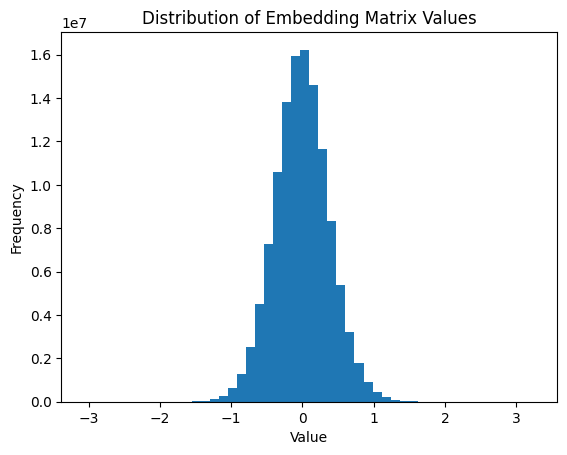

In [ ]:
# Display the embedding matrix shape to confirm dimensions
print("Embedding Matrix Shape:", embedding_matrix.shape)
print("Expected Shape:", (VOCAB_SIZE, dimension))  # Expected shape should match (vocab size, embedding dimension)

# Sample some words to verify their embeddings from GloVe and our embedding matrix
sample_words = ['example', 'good', 'bad']  # Replace with words known in the GloVe dictionary
for word in sample_words:
    if word in vocab:
        idx = vocab[word]
        print(f"Word: {word}")
        print("GloVe Embedding:", glove[word])
        print("Embedding Matrix:", embedding_matrix[idx])
        print()

# Check embeddings for special tokens <pad> and <unk>
print("Embedding for <pad> token:", embedding_matrix[vocab['<pad>']])
print("Embedding for <unk> token:", embedding_matrix[vocab['<unk>']])

# Plot the distribution of values in the embedding matrix for analysis
plt.hist(embedding_matrix.flatten(), bins=50)
plt.title("Distribution of Embedding Matrix Values")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()


In [ ]:
# Set a maximum length for padding/truncating sequences
MAX_LENGTH = 200  # Defines the maximum number of tokens per sequence to ensure consistent input sizes

In [ ]:
# Padding function for sequences
def pad_tokens(tokens):
    """
    Pads or truncates a list of tokens to ensure it reaches the specified MAX_LENGTH.
    If the sequence is shorter than MAX_LENGTH, it pads with the <pad> token.
    If longer, it truncates to the first MAX_LENGTH tokens.

    Args:
        tokens (list): List of token IDs representing a sequence.

    Returns:
        list: List of token IDs with length equal to MAX_LENGTH.
    """
    if len(tokens) >= MAX_LENGTH:
        return tokens[:MAX_LENGTH]  # Truncate to MAX_LENGTH if sequence is too long
    else:
        return tokens + [vocab['<pad>']] * (MAX_LENGTH - len(tokens))  # Pad with <pad> token if too short

In [ ]:
class JigsawDataset(Dataset):
    """
    Custom Dataset class for the Jigsaw Toxic Comment Classification dataset.
    This class is compatible with PyTorch's DataLoader and is designed to handle both
    training and test datasets.

    Args:
        df (DataFrame): DataFrame containing comment text and, optionally, target labels.
        target_cols (list): List of target column names.
        is_test (bool): Specifies whether the dataset is a test set (no labels available).

    Methods:
        __getitem__(index): Returns a tuple (input_tensor, target_tensor) for a given index.
            - input_tensor: Tensor of tokenized and padded comment text.
            - target_tensor: Tensor of target labels or a zero tensor for test data.
        __len__(): Returns the length of the dataset.
    """
    def __init__(self, df, target_cols, is_test=False):
        self.df = df
        self.target_cols = target_cols
        self.is_test = is_test

    def __getitem__(self, index):
        # Get comment text, tokenize, and convert to lower case
        comment_text = self.df.iloc[index]['comment_text'].lower()
        tokens = word_tokenize(comment_text)
        input_ids = pad_tokens(numericalize(tokens, vocab))  # Numericalize and pad tokens

        # Convert input_ids to a tensor
        input_tensor = torch.tensor(input_ids, dtype=torch.long)

        # Set up target tensor
        if self.is_test:
            # For test data, return zero tensor as target
            target_tensor = torch.tensor([0] * len(self.target_cols), dtype=torch.float)
        else:
            # For training data, return target labels
            target_tensor = torch.tensor(self.df[self.target_cols].values[index], dtype=torch.float)

        return input_tensor, target_tensor

    def __len__(self):
        # Return the total number of samples in the dataset
        return len(self.df)

In [ ]:
# Create a Dataset instance for the training data
raw_ds = JigsawDataset(raw_df, target_cols)

In [ ]:
# Define the fraction of data to use for validation
VAL_FRAC = 0.25

# Calculate the number of samples for training and validation based on the dataset size
train_size = int((1 - VAL_FRAC) * len(raw_ds))
val_size = len(raw_ds) - train_size

# Split the dataset into training and validation subsets
train_ds, val_ds = random_split(raw_ds, [train_size, val_size])

In [ ]:
# Initialize test dataset for inference
test_ds = JigsawDataset(test_df, target_cols, is_test=True)

In [ ]:
# Check dataset sizes
print(f"Training set size: {len(train_ds)}")
print(f"Validation set size: {len(val_ds)}")
print(f"Test set size: {len(test_ds)}")

# Display a few samples from each dataset
for ds, name in zip([train_ds, val_ds, test_ds], ["Train", "Validation", "Test"]):
    print(f"\n{name} Dataset Sample:")
    input_tensor, target_tensor = ds[0]  # Retrieve the first item in each dataset

    # Print basic shape info and verify tensor contents
    print(f"Input tensor shape: {input_tensor.shape} (Expected: {MAX_LENGTH})")
    print(f"Input tensor (first 10 tokens): {input_tensor[:10]}")  # Show first few tokens

    # Check if the dataset is the test set by accessing test_ds.is_test
    if name != "Test":  # Only show target tensor for training/validation sets
        print(f"Target tensor: {target_tensor}")
    else:
        print(f"Target tensor (expected zeros for test): {target_tensor}")

Training set size: 119678
Validation set size: 39893
Test set size: 153164

Train Dataset Sample:
Input tensor shape: torch.Size([200]) (Expected: 200)
Input tensor (first 10 tokens): tensor([ 1767,    47,     1,    15, 21246,   122,   743,     6,   205,    14])
Target tensor: tensor([0., 0., 0., 0., 0., 0.])

Validation Dataset Sample:
Input tensor shape: torch.Size([200]) (Expected: 200)
Input tensor (first 10 tokens): tensor([ 826,   83,  269,  916,  145, 7944,    3,   43,  826,   83])
Target tensor: tensor([0., 0., 0., 0., 0., 0.])

Test Dataset Sample:
Input tensor shape: torch.Size([200]) (Expected: 200)
Input tensor (first 10 tokens): tensor([ 16038,  30621,  22719,   1069,     16,     58, 118578,    129,     83,
           771])
Target tensor (expected zeros for test): tensor([0., 0., 0., 0., 0., 0.])


In [ ]:
# DataLoader Parameters
BATCH_SIZE = 256  # Define the batch size for training

# Create DataLoader for the training dataset
train_dl = DataLoader(
    train_ds,         # The training dataset
    batch_size=BATCH_SIZE,  # Set the batch size
    shuffle=True,     # Shuffle the data for randomness in training
    num_workers=4,    # Number of subprocesses to use for data loading
    pin_memory=True    # Enable memory pinning for faster data transfer to GPU
)

# Create DataLoader for the validation dataset
val_dl = DataLoader(
    val_ds,           # The validation dataset
    batch_size=BATCH_SIZE * 2,  # Set the batch size (larger for validation)
    shuffle=False,    # No need to shuffle validation data
    num_workers=4,    # Number of subprocesses to use for data loading
    pin_memory=True    # Enable memory pinning for faster data transfer to GPU
)

# Create DataLoader for the test dataset
test_dl = DataLoader(
    test_ds,          # The test dataset
    batch_size=BATCH_SIZE * 2,  # Set the batch size (larger for testing)
    shuffle=False,    # No need to shuffle test data
    num_workers=4,    # Number of subprocesses to use for data loading
    pin_memory=True    # Enable memory pinning for faster data transfer to GPU
)


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


In [ ]:
# Check if DataLoaders are correct
def check_dataloader(dataloader):
    for batch in dataloader:
        input_tensor, target_tensor = batch
        print(f"Input Tensor Shape: {input_tensor.shape}")
        print(f"Target Tensor Shape: {target_tensor.shape}")
        print(f"Input Tensor (first 10 tokens): {input_tensor[0][:10]}")
        print(f"Target Tensor: {target_tensor[0]}")
        break  # Check the first batch only

# Run checks
print("Checking training DataLoader:")
check_dataloader(train_dl)

print("\nChecking validation DataLoader:")
check_dataloader(val_dl)

print("\nChecking test DataLoader:")
check_dataloader(test_dl)

Checking training DataLoader:
Input Tensor Shape: torch.Size([256, 200])
Target Tensor Shape: torch.Size([256, 6])
Input Tensor (first 10 tokens): tensor([ 8697,     6, 27080,  3269,     2, 27080,  3269,    16,  3954,     3])
Target Tensor: tensor([0., 0., 0., 0., 0., 0.])

Checking validation DataLoader:
Input Tensor Shape: torch.Size([512, 200])
Target Tensor Shape: torch.Size([512, 6])
Input Tensor (first 10 tokens): tensor([ 826,   83,  269,  916,  145, 7944,    3,   43,  826,   83])
Target Tensor: tensor([0., 0., 0., 0., 0., 0.])

Checking test DataLoader:
Input Tensor Shape: torch.Size([512, 200])
Target Tensor Shape: torch.Size([512, 6])
Input Tensor (first 10 tokens): tensor([ 16038,  30621,  22719,   1069,     16,     58, 118578,    129,     83,
           771])
Target Tensor: tensor([0., 0., 0., 0., 0., 0.])


### JigsawModel Definition and Training Process

In this section, we define the `JigsawModel` class using PyTorch Lightning, which incorporates a Bidirectional LSTM (BiLSTM) architecture to classify comments based on their toxicity levels. The model leverages pre-trained GloVe embeddings for input representation, allowing it to understand word semantics effectively.

#### 1. Model Architecture
The model consists of the following components:
- **GloVe Embeddings**: Pre-trained embeddings are loaded into an embedding layer, allowing the model to capture semantic relationships between words.
- **BiLSTM Layer**: This layer captures both forward and backward context from the input sequences, making it well-suited for sequence data like text.
- **Pooling and Normalization**: Global max pooling is applied to reduce dimensionality, followed by batch normalization and dropout layers to enhance model performance and prevent overfitting.
- **Fully Connected Layers**: Two fully connected layers are included, with the output layer designed for multi-label classification.

#### 2. Forward Pass
The forward pass through the model involves:
- Embedding the input sequences.
- Passing them through the BiLSTM to capture context.
- Applying pooling and normalization.
- Finally, obtaining the output logits.

#### 3. Training and Validation Steps
The model defines specific methods for training and validation:
- **Training Step**: Computes the binary cross-entropy loss using the model’s outputs and the target labels.
- **Validation Step**: Similar to the training step but includes logging the validation loss for monitoring model performance.

#### 4. Prediction Step
A separate method is implemented to handle predictions during inference, applying the sigmoid function to the model outputs to obtain probabilities for multi-label classification.

#### 5. Checkpointing and Trainer Initialization
To save the best-performing models during training, we initialize a checkpoint callback. The PyTorch Lightning Trainer is set up with the following configurations:
- **Max Epochs**: The training process is capped at 20 epochs.
- **GPU Acceleration**: The model is configured to utilize GPU resources for faster training.
- **Callbacks**: The checkpoint callback is included to ensure that only the top models based on validation loss are saved.

#### 6. Learning Rate Finding
To optimize the learning process, we employ a learning rate finder. The `Tuner` class is used to identify the best learning rate for training, which can significantly influence model convergence and performance.

Through this structured approach, we aim to build an effective model for the toxic comment classification task, leveraging advanced deep learning techniques while ensuring robust training practices.

In [ ]:
class JigsawModel(pl.LightningModule):
    def __init__(self):
        super().__init__()
        # Use pre-trained GloVe embedding matrix for input representation
        self.emb = nn.Embedding.from_pretrained(torch.tensor(embedding_matrix, dtype=torch.float32), freeze=False)

        # BiLSTM layer to capture both forward and backward context from the input sequences
        self.bilstm = nn.LSTM(input_size=dimension, hidden_size=128, num_layers=1,
                              bidirectional=True, batch_first=True)

        # Layers for pooling, normalization, and regularization to improve model performance
        self.global_max_pool = nn.AdaptiveMaxPool1d(1)  # Global max pooling to reduce dimensionality
        self.batch_norm = nn.BatchNorm1d(128 * 2)       # Batch normalization for bidirectional output
        self.dropout = nn.Dropout(0.15)                  # Dropout layer for regularization

        # Fully connected layers for classification
        self.fc1 = nn.Linear(128 * 2, 100)               # First FC layer; input size matches BiLSTM output
        self.fc2 = nn.Linear(100, 6)                     # Second FC layer; output size for multi-label classification

        # Set learning rate for optimizer
        self.learning_rate = 0.0001

    def forward(self, x):
        # Forward pass through the model
        x = self.emb(x)  # Get embeddings for input sequences

        # Pass embeddings through BiLSTM
        lstm_out, _ = self.bilstm(x)

        # Permute output for pooling and apply global max pooling
        lstm_out = lstm_out.permute(0, 2, 1)  # Change shape for pooling
        pooled_out = self.global_max_pool(lstm_out).squeeze(-1)  # Reduce dimensionality

        # Apply normalization and dropout
        normed_out = self.batch_norm(pooled_out)
        dropout_out = self.dropout(normed_out)

        # Fully connected layers with ReLU activation
        fc1_out = F.relu(self.fc1(dropout_out))  # Apply ReLU to the first FC layer
        output = self.fc2(fc1_out)

        # Apply Sigmoid directly in the forward pass for multi-label classification
        output = torch.sigmoid(output)

        return output

    def training_step(self, batch, batch_idx):
        # Training step to calculate loss
        inputs, targets = batch  # Unpack inputs and targets from the batch
        outputs = self(inputs)  # Forward pass to get model predictions
        loss = F.binary_cross_entropy(outputs, targets)  # Calculate binary cross-entropy loss
        return loss

    def validation_step(self, batch, batch_idx):
        # Validation step to calculate and log loss
        inputs, targets = batch  # Unpack inputs and targets from the batch
        outputs = self(inputs)  # Forward pass to get model predictions
        loss = F.binary_cross_entropy(outputs, targets)  # Calculate binary cross-entropy loss
        self.log('val_loss', loss)  # Log validation loss for monitoring
        return loss

    def on_validation_epoch_end(self):
        # Callback at the end of each validation epoch to print average loss
        avg_loss = self.trainer.callback_metrics['val_loss'].item()  # Get the average validation loss
        print(f"Epoch #{self.current_epoch}; Loss: {avg_loss:.4f}")

    def predict_step(self, batch, batch_idx):
        # Forward pass for predictions
        inputs, _ = batch  # Unpack inputs; targets are not used for predictions
        outputs = self(inputs)  # Get model predictions
        return outputs

    def configure_optimizers(self):
      optimizer = torch.optim.Adam(self.parameters(), lr=self.learning_rate)
      scheduler = {
          'scheduler': torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=5, verbose=True),
          'monitor': 'val_loss'  # Monitors the validation loss to adjust learning rate
      }
      return [optimizer], [scheduler]

In [ ]:
# Instantiate the JigsawModel class to create a model object
model = JigsawModel()

In [ ]:
# Save the model's state dictionary (weights and biases) to a file for future use
torch.save(model.state_dict(), 'untrained_model.pth')

In [ ]:
# Iterate over batches from the training DataLoader
for batch in train_dl:
    b_inputs, b_targets = batch

    # Print the shape of input and target tensors
    print("Input shape:", b_inputs.shape)      # Should be [batch_size, MAX_LENGTH]
    print("Target shape:", b_targets.shape)    # Should be [batch_size, num_labels]

    # Pass the input batch through the model to obtain predictions
    outputs = model(b_inputs)
    print("Outputs shape:", outputs.shape)     # Expected shape: [batch_size, num_labels]

    # Calculate binary cross-entropy loss between model outputs and target labels
    loss = F.binary_cross_entropy(outputs, b_targets)  # Sigmoid already applied in model
    print("Loss:", loss.item())  # Display the computed loss value

    # Break after the first batch for demonstration purposes
    break

Input shape: torch.Size([256, 200])
Target shape: torch.Size([256, 6])
Outputs shape: torch.Size([256, 6])
Loss: 0.706606388092041


In [ ]:
# Initialize the checkpoint callback to save model checkpoints
checkpoint_callback = ModelCheckpoint(
    dirpath='checkpoints/',  # Directory where the checkpoints will be saved
    filename='jigsaw_model-{epoch:02d}-{val_loss:.2f}',  # Format for the checkpoint filename
    save_top_k=1,  # Save only the top 1 models based on validation loss
    monitor='val_loss',  # Metric to monitor for saving the model
    mode='min'  # Save the model with the lowest validation loss
)

In [ ]:
# Initialize the Trainer with the checkpoint callback and GPU settings
trainer = pl.Trainer(
    max_epochs=10,  # Set the maximum number of training epochs
    accelerator='gpu',  # Use GPU acceleration
    devices=1,  # Use a single GPU for training
    callbacks=[checkpoint_callback]  # Include the checkpoint callback to save models
)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


In [ ]:
# Perform learning rate finding
tuner = Tuner(trainer)  # Initialize the Tuner with the Trainer instance

# Run the learning rate finder to determine optimal learning rate
lr_find_results = tuner.lr_find(model,
                                 train_dataloaders=train_dl,  # Training data loader
                                 val_dataloaders=val_dl)  # Validation data loader

INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch #0; Loss: 0.7027


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_steps=100` reached.
INFO:pytorch_lightning.tuner.lr_finder:Learning rate set to 0.008317637711026709
INFO:pytorch_lightning.utilities.rank_zero:Restoring states from the checkpoint path at /content/.lr_find_bac6de3d-e4a1-4b0b-91f9-4256204d51dc.ckpt
INFO:pytorch_lightning.utilities.rank_zero:Restored all states from the checkpoint at /content/.lr_find_bac6de3d-e4a1-4b0b-91f9-4256204d51dc.ckpt


In [ ]:
# Set the optimal learning rate suggested by the tuner
model.learning_rate = lr_find_results.suggestion()

In [ ]:
model.learning_rate

0.0001

In [ ]:
model.learning_rate = 0.0001

In [ ]:
model.learning_rate

0.0001

### Model Training, Inference, and Submission Preparation

In this section, we train the JigsawModel using the defined DataLoaders for training and validation datasets. After training, we evaluate the model's performance and prepare the predictions for submission.

In [ ]:
# Train the model (the best checkpoint will be saved automatically)
trainer.fit(model, train_dl, val_dl)

INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name            | Type              | Params | Mode 
--------------------------------------------------------------
0 | emb             | Embedding         | 120 M  | train
1 | bilstm          | LSTM              | 440 K  | train
2 | global_max_pool | AdaptiveMaxPool1d | 0      | train
3 | batch_norm      | BatchNorm1d       | 512    | train
4 | dropout         | Dropout           | 0      | train
5 | fc1             | Linear            | 25.7 K | train
6 | fc2             | Linear            | 606    | train
--------------------------------------------------------------
120 M     Trainable params
0         Non-trainable params
120 M     Total params
481.871   Total estimated model params size (MB)
7         Modules in train mode
0         Modules in eval mode


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Epoch #0; Loss: 0.6941


Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Epoch #0; Loss: 0.0651


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch #1; Loss: 0.0539


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch #2; Loss: 0.0498


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch #3; Loss: 0.0476


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch #4; Loss: 0.0462


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch #5; Loss: 0.0448


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch #6; Loss: 0.0441


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch #7; Loss: 0.0444


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch #8; Loss: 0.0441


Validation: |          | 0/? [00:00<?, ?it/s]

Epoch #9; Loss: 0.0440


INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=10` reached.


In [ ]:
# Load the best model checkpoint for inference
best_model_path = checkpoint_callback.best_model_path  # Retrieve the best model path from the checkpoint
model = JigsawModel.load_from_checkpoint(best_model_path)  # Load the best model

In [ ]:
# Set model to evaluation mode for inference
model.eval()  # Switch the model to evaluation mode

In [ ]:
# Reinitialize Trainer with single GPU configuration for inference
trainer = pl.Trainer(accelerator='gpu', devices=1)  # Create a Trainer instance for predictions

In [ ]:
# Run predictions on the test set
test_preds = trainer.predict(model, test_dl)  # Generate predictions using the test DataLoader

In [ ]:
# Concatenate all predictions from the test DataLoader
test_preds = torch.cat(test_preds)  # Combine predictions into a single tensor

In [ ]:
# Check prediction shape
print("Test predictions shape:", test_preds.shape)  # Display the shape of the predictions

In [ ]:
# Apply sigmoid to convert raw outputs to probabilities for multi-label classification
test_probs = torch.sigmoid(test_preds)  # Apply sigmoid activation to get probabilities

In [ ]:
# Add predictions to submission DataFrame
sub_df[target_cols] = test_probs.detach().cpu().numpy()  # Store probabilities in the submission DataFrame

In [ ]:
# Export submission DataFrame to CSV
sub_df.to_csv('submissionDL.csv', index=None)  # Save the DataFrame as a CSV file
print("Submission saved to submissionDL.csv")  # Confirm the submission file creation

## DistilBERT Model

### DistilBERT Model Preparation for Toxicity Classification

In this section, we focus on preparing the DistilBERT model for the multi-label classification of toxic comments. This involves splitting the dataset, initializing the model and tokenizer, and creating a custom dataset class for handling input data.

In [ ]:
# Split the dataset into training and validation sets
train_texts, val_texts, train_labels, val_labels = train_test_split(
    raw_df['comment_text'],  # Features: the text comments from the DataFrame
    raw_df[target_cols],     # Labels: the corresponding target columns for multi-label classification
    test_size=0.2,           # Set aside 20% of the data for validation
    random_state=42          # Ensures reproducibility of the split
)

In [ ]:
# Specify the model checkpoint for DistilBERT
checkpoint = "distilbert-base-uncased"  # Pre-trained DistilBERT model

# Load the tokenizer for the specified checkpoint
tokenizer = DistilBertTokenizer.from_pretrained(checkpoint)  # Initializes the tokenizer

# Load the DistilBERT model for multi-label classification
model = DistilBertForSequenceClassification.from_pretrained(
    checkpoint,                # Model checkpoint
    num_labels=6,             # Specify the number of labels for multi-label classification
    problem_type="multi_label_classification"  # Define the problem type as multi-label
)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
class CustomDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_len=256):
        """
        Initialize the dataset with texts, labels, tokenizer, and maximum sequence length.

        Parameters:
        - texts: List of input texts (comments).
        - labels: List of corresponding labels for multi-label classification.
        - tokenizer: The tokenizer used to preprocess the text.
        - max_len: Maximum length of the tokenized input sequences.
        """
        self.texts = texts  # Store input texts
        self.labels = labels  # Store corresponding labels
        self.tokenizer = tokenizer  # Store the tokenizer
        self.max_len = max_len  # Set the maximum sequence length

    def __len__(self):
        """Return the number of samples in the dataset."""
        return len(self.texts)

    def __getitem__(self, idx):
        """
        Retrieve a sample from the dataset at the specified index.

        Parameters:
        - idx: Index of the sample to retrieve.

        Returns:
        A dictionary containing input IDs, attention mask, and labels.
        """
        text = str(self.texts[idx])  # Get the text at the specified index
        label = torch.tensor(self.labels[idx], dtype=torch.float)  # Convert label to tensor

        # Tokenize the input text and return input IDs and attention mask
        encoding = self.tokenizer(
            text,
            truncation=True,  # Truncate sequences longer than max_len
            padding='max_length',  # Pad sequences to max_len
            max_length=self.max_len,  # Set the maximum length for tokenization
            return_tensors='pt'  # Return PyTorch tensors
        )

        return {
            'input_ids': encoding['input_ids'].flatten(),  # Flatten input IDs
            'attention_mask': encoding['attention_mask'].flatten(),  # Flatten attention mask
            'labels': label  # Include the label tensor
        }

In [ ]:
# Create the training dataset using the CustomDataset class
train_dataset = CustomDataset(
    train_texts.values,  # Input texts for training
    train_labels.values,  # Corresponding labels for training
    tokenizer  # The tokenizer to preprocess the texts
)

# Create the validation dataset using the CustomDataset class
val_dataset = CustomDataset(
    val_texts.values,  # Input texts for validation
    val_labels.values,  # Corresponding labels for validation
    tokenizer  # The same tokenizer for consistency
)

In [ ]:
# Retrieve the first item from the training dataset
first_item = train_dataset[0]

# Display the contents of the first item
print(first_item)

{'input_ids': tensor([  101, 13055, 26568,  2323,  6402,  1999, 11669, 13055, 26568,  2003,
        11669,  1012,  1045,  5223, 13055, 26568,  1012,  1042,  1003,  1003,
         1047,  2014,  2000,  3109,   999,  6390,  1012,  6356,  1012,  6146,
         1012,  2871,   102,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0, 

### Model Training, Evaluation and Inference with DistilBERT

In this section, we train and then evaluate the performance of the fine-tuned DistilBERT model on the toxic comment classification task and demonstrate how to make predictions on new text inputs.

In [ ]:
def multi_labels_metrics(predictions, labels, threshold=0.3):
    """
    Calculate multi-label classification metrics.

    Parameters:
    - predictions: The raw model predictions (logits).
    - labels: The true labels for the samples.
    - threshold: The threshold for converting probabilities to binary predictions.

    Returns:
    A dictionary containing the F1 score, ROC AUC score, and Hamming loss.
    """
    sigmoid = torch.nn.Sigmoid()  # Initialize the sigmoid activation function
    probs = sigmoid(torch.Tensor(predictions))  # Apply sigmoid to convert logits to probabilities

    # Initialize predictions array and apply threshold
    y_pred = np.zeros(probs.shape)
    y_pred[np.where(probs >= threshold)] = 1  # Set predictions to 1 if probabilities exceed the threshold
    y_true = labels  # True labels

    # Calculate metrics
    f1 = f1_score(y_true, y_pred, average='macro')  # F1 score (macro-averaged)
    roc_auc = roc_auc_score(y_true, y_pred, average='macro')  # ROC AUC score (macro-averaged)
    hamming = hamming_loss(y_true, y_pred)  # Hamming loss

    return {
        'f1': f1,
        'roc_auc': roc_auc,
        'hamming': hamming
    }

def compute_metrics(p: EvalPrediction):
    """
    Compute metrics from model predictions.

    Parameters:
    - p: An EvalPrediction object containing predictions and label IDs.

    Returns:
    A dictionary of calculated metrics.
    """
    # Retrieve predictions; handle tuple case if necessary
    preds = p.predictions[0] if isinstance(p.predictions, tuple) else p.predictions
    result = multi_labels_metrics(predictions=preds, labels=p.label_ids)  # Calculate metrics
    return result

In [ ]:
# Define the training arguments for the model
args = TrainingArguments(
    per_device_train_batch_size=8,  # Batch size for training per device (GPU/CPU)
    per_device_eval_batch_size=8,    # Batch size for evaluation per device (GPU/CPU)
    output_dir='./results',           # Directory to save model predictions and checkpoints
    num_train_epochs=5,               # Number of epochs to train the model
    save_steps=1000,                  # Number of steps before saving a model checkpoint
    save_total_limit=2,               # Limit the total number of checkpoints. Older ones will be deleted.
    report_to="none"                  # Disables logging to Weights & Biases (W&B)
)

In [ ]:
# Initialize the Trainer with the specified model, arguments, datasets, and metrics
trainer = Trainer(
    model=model,                      # The model to be trained
    args=args,                        # The training arguments defined earlier
    train_dataset=train_dataset,      # The dataset for training
    eval_dataset=val_dataset,         # The dataset for evaluation
    compute_metrics=compute_metrics    # Function to compute evaluation metrics
)

In [ ]:
# Start the training process
trainer.train()

In [ ]:
# Start the evaluation process
evaluation_results = trainer.evaluate()

In [ ]:
# Save the trained model to the specified directory
trainer.save_model("distilbert_finetuned_multilabel_classification")

In [ ]:
!zip -r distilbert_finetuned_multilabel_classification.zip "/content/distilbert_finetuned_multilabel_classification"

In [ ]:
# Define the text input
text = "I hate you"  # Example text for which we want predictions

# Encode the text using the tokenizer
encoding = tokenizer(text, return_tensors="pt")  # Tokenize the input and return PyTorch tensors

# Move the encoding to the same device as the model (GPU or CPU)
encoding = {key: value.to(trainer.model.device) for key, value in encoding.items()}

# Obtain outputs from the model
outputs = trainer.model(**encoding)  # Pass the encoded input to the model

In [ ]:
# Apply sigmoid activation to the model's output logits
sigmoid = torch.nn.Sigmoid()  # Initialize the sigmoid function
probs = sigmoid(outputs.logits[0].cpu())  # Apply sigmoid and move the output to CPU

# Initialize a predictions array
preds = np.zeros(probs.shape)  # Create an array of zeros with the same shape as probabilities

# Set predictions to 1 where probabilities meet or exceed the threshold
preds[np.where(probs >= 0.3)] = 1  # Assign 1 for probabilities greater than or equal to 0.3

# Output the predictions
preds